In [1]:
import torch 
import torch.nn as nn
from torch.autograd import grad
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import time

dev = torch.device('cpu')
if torch.cuda.is_available():
    print("CUDA is available, running on GPU")
    dev = torch.device('cuda')
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
else:
    print("CUDA not available, running on CPU")

class MultiLayerNet(torch.nn.Module):

    def __init__(self, num_input_neurons, num_hidden_neurons, num_output_neurons):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        """creating 4 layers of the feedforward nn and defining the weights, biases and the 
        sample values of the neural network """
        super(MultiLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(num_input_neurons, num_hidden_neurons)
        self.linear2 = torch.nn.Linear(num_hidden_neurons, num_hidden_neurons)
        self.linear3 = torch.nn.Linear(num_hidden_neurons, num_hidden_neurons)
        self.linear4 = torch.nn.Linear(num_hidden_neurons, num_output_neurons)

        "Defining the biasness of the neural network"
        torch.nn.init.constant_(self.linear1.bias, 0.)
        torch.nn.init.constant_(self.linear2.bias, 0.)
        torch.nn.init.constant_(self.linear3.bias, 0.)
        torch.nn.init.constant_(self.linear4.bias, 0.)

        "Stating that the ffnn will follow normal distribution with initial mean=0 & standard deviation of 0.1"
        torch.nn.init.normal_(self.linear1.weight, mean=0, std=0.1)
        torch.nn.init.normal_(self.linear2.weight, mean=0, std=0.1)
        torch.nn.init.normal_(self.linear3.weight, mean=0, std=0.1)
        torch.nn.init.normal_(self.linear4.weight, mean=0, std=0.1)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """

        y1 = torch.tanh(self.linear1(x))
        y2 = torch.tanh(self.linear2(y1))
        y3 = torch.tanh(self.linear3(y2))
        y = self.linear4(y3)
        return y


CUDA not available, running on CPU


In [2]:
class IntegrationLoss:
    def __init__(self, numIntType, dim):
        print("Constructor: IntegrationLoss ", numIntType, " in ", dim, " dimension ")
        self.type = numIntType
        "Storing the dimensions of the loss tensor formed"
        self.dim = dim

    def lossInternalEnergy(self, f, x=None, dx=1.0, dy=1.0, dz=1.0, shape=None):
        return self.approxIntegration(f, x, dx, dy, dz, shape)

    def lossExternalEnergy(self, f, x=None, dx=1.0, dy=1.0, dz=1.0, shape=None):
        if self.type == 'trapezoidal':
            # print("Trapezoidal rule")
            if self.dim == 2:
                if x is not None:
                    return self.trapz1D(f, x=x)
                else:
                    return self.trapz1D(f, dx=dx)
            if self.dim == 3:
                if x is not None:
                    return self.trapz2D(f, xy=x, shape=shape)
                else:
                    return self.trapz2D(f, dx=dx, dy=dy, shape=shape)
        if self.type == 'simpson':
            # print("Simpson rule")
            if self.dim == 2:
                if x is not None:
                    return self.simps1D(f, x=x)
                else:
                    return self.simps1D(f, dx=dx)
            if self.dim == 3:
                if x is not None:
                    return self.simps2D(f, xy=x, shape=shape)
                else:
                    return self.simps2D(f, dx=dx, dy=dy, shape=shape)

    def approxIntegration(self, f, x=None, dx=1.0, dy=1.0, dz=1.0, shape=None):
        if self.type == 'trapezoidal':
            # print("Trapezoidal rule")
            if self.dim == 1:
                if x is not None:
                    return self.trapz1D(f, x=x)
                else:
                    return self.trapz1D(f, dx=dx)
            if self.dim == 2:
                if x is not None:
                    return self.trapz2D(f, xy=x, shape=shape)
                else:
                    return self.trapz2D(f, dx=dx, dy=dy, shape=shape)
            if self.dim == 3:
                if x is not None:
                    return self.trapz3D(f, xyz=x, shape=shape)
                else:
                    return self.trapz3D(f, dx=dx, dy=dy, dz=dz, shape=shape)
        if self.type == 'simpson':
            # print("Simpson rule")
            if self.dim == 1:
                if x is not None:
                    return self.simps1D(f, x=x)
                else:
                    return self.simps1D(f, dx=dx)
            if self.dim == 2:
                if x is not None:
                    return self.simps2D(f, xy=x, shape=shape)
                else:
                    return self.simps2D(f, dx=dx, dy=dy, shape=shape)
            if self.dim == 3:
                if x is not None:
                    return self.simps3D(f, xyz=x, shape=shape)
                else:
                    return self.simps3D(f, dx=dx, dy=dy, dz=dz, shape=shape)

    def trapz1D(self, y, x=None, dx=1.0, axis=-1):
        "Converting it into a 1D array"
        y1D = y.flatten()
        if x is not None:
            x1D = x.flatten()
            
            return self.trapz(y1D, x1D, dx=dx, axis=axis)
        else:
            return self.trapz(y1D, dx=dx)

    def trapz2D(self, f, xy=None, dx=None, dy=None, shape=None):
        f2D = f.reshape(shape[0], shape[1])
        if dx is None and dy is None:
            x = xy[:, 0].flatten().reshape(shape[0], shape[1])
            y = xy[:, 1].flatten().reshape(shape[0], shape[1])
            return self.trapz(self.trapz(f2D, y[0, :]), x[:, 0])
        else:
            return self.trapz(self.trapz(f2D, dx=dy), dx=dx)

    def trapz3D(self, f, xyz=None, dx=None, dy=None, dz=None, shape=None):
        f3D = f.reshape(shape[0], shape[1], shape[2])
        if dx is None and dy is None and dz is None:
            print("dxdydz - trapz3D - Need to implement !!!")
        else:
            return self.trapz(self.trapz(self.trapz(f3D, dx=dz), dx=dy), dx=dx)

    def simps1D(self, f, x=None, dx=1.0, axis=-1):
        f1D = f.flatten()
        if x is not None:
            x1D = x.flatten()
            return self.simps(f1D, x1D, dx=dx, axis=axis)
        else:
            return self.simps(f1D, dx=dx, axis=axis)

    def simps2D(self, f, xy=None, dx=None, dy=None, shape=None):
        f2D = f.reshape(shape[0], shape[1])
        if dx is None and dy is None:
            x = xy[:, 0].flatten().reshape(shape[0], shape[1])
            y = xy[:, 1].flatten().reshape(shape[0], shape[1])
            return self.simps(self.simps(f2D, y[0, :]), x[:, 0])
        else:
            return self.simps(self.simps(f2D, dx=dy), dx=dx)

    def simps3D(self, f, xyz=None, dx=None, dy=None, dz=None, shape=None):
        f3D = f.reshape(shape[0], shape[1], shape[2])
        if dx is None and dy is None and dz is None:
            print("dxdydz - trapz3D - Need to implement !!!")
        else:
            return self.simps(self.simps(self.simps(f3D, dx=dz), dx=dy), dx=dx)

    def montecarlo1D(self, fx, l):
        return l * torch.sum(fx) / fx.data.nelement()

    def montecarlo2D(self, fxy, lx, ly):
        area = lx * ly
        return area * torch.sum(fxy) / fxy.data.nelement()

    def montecarlo3D(self, fxyz, lx, ly, lz):
        volume = lx * ly * lz
        return volume * torch.sum(fxyz) / fxyz.data.nelement()

    def simps(self, y, x=None, dx=1, axis=-1, even='avg'):
        # import scipy.integrate as sp
        # sp.simps()
        # y = torch.tensor(y)
        nd = len(y.shape)
        N = y.shape[axis]
        last_dx = dx
        first_dx = dx
        returnshape = 0
        if x is not None:
            # x = torch.tensor(x)
            if len(x.shape) == 1:
                shapex = [1] * nd
                shapex[axis] = x.shape[0]
                saveshape = x.shape
                returnshape = 1
                x = x.reshape(tuple(shapex))
            elif len(x.shape) != len(y.shape):
                raise ValueError("If given, shape of x must be 1-d or the "
                                 "same as y.")
            if x.shape[axis] != N:
                raise ValueError("If given, length of x along axis must be the "
                                 "same as y.")
        if N % 2 == 0:
            val = 0.0
            result = 0.0
            slice1 = (slice(None),) * nd
            slice2 = (slice(None),) * nd
            if even not in ['avg', 'last', 'first']:
                raise ValueError("Parameter 'even' must be "
                                 "'avg', 'last', or 'first'.")
            # Compute using Simpson's rule on first intervals
            if even in ['avg', 'first']:
                slice1 = self.tupleset(slice1, axis, -1)
                slice2 = self.tupleset(slice2, axis, -2)
                if x is not None:
                    last_dx = x[slice1] - x[slice2]
                val += 0.5 * last_dx * (y[slice1] + y[slice2])
                result = self._basic_simps(y, 0, N - 3, x, dx, axis)
            # Compute using Simpson's rule on last set of intervals
            if even in ['avg', 'last']:
                slice1 = self.tupleset(slice1, axis, 0)
                slice2 = self.tupleset(slice2, axis, 1)
                if x is not None:
                    first_dx = x[tuple(slice2)] - x[tuple(slice1)]
                val += 0.5 * first_dx * (y[slice2] + y[slice1])
                result += self._basic_simps(y, 1, N - 2, x, dx, axis)
            if even == 'avg':
                val /= 2.0
                result /= 2.0
            result = result + val
        else:
            result = self._basic_simps(y, 0, N - 2, x, dx, axis)
        if returnshape:
            x = x.reshape(saveshape)
        return result

    def tupleset(self, t, i, value):
        l = list(t)
        l[i] = value
        return tuple(l)

    def _basic_simps(self, y, start, stop, x, dx, axis):
        nd = len(y.shape)
        if start is None:
            start = 0
        step = 2
        slice_all = (slice(None),) * nd
        slice0 = self.tupleset(slice_all, axis, slice(start, stop, step))
        slice1 = self.tupleset(slice_all, axis, slice(start + 1, stop + 1, step))
        slice2 = self.tupleset(slice_all, axis, slice(start + 2, stop + 2, step))

        if x is None:  # Even spaced Simpson's rule.
            result = torch.sum(dx / 3.0 * (y[slice0] + 4 * y[slice1] + y[slice2]), axis)
        else:
            # Account for possibly different spacings.
            #    Simpson's rule changes a bit.
            # h = np.diff(x, axis=axis)
            h = self.torch_diff_axis_0(x, axis=axis)
            sl0 = self.tupleset(slice_all, axis, slice(start, stop, step))
            sl1 = self.tupleset(slice_all, axis, slice(start + 1, stop + 1, step))
            h0 = h[sl0]
            h1 = h[sl1]
            hsum = h0 + h1
            hprod = h0 * h1
            h0divh1 = h0 / h1
            tmp = hsum / 6.0 * (y[slice0] * (2 - 1.0 / h0divh1) +
                                y[slice1] * hsum * hsum / hprod +
                                y[slice2] * (2 - h0divh1))
            result = torch.sum(tmp, dim=axis)
        return result

    def torch_diff_axis_0(self, a, axis):
        if axis == 0:
            return a[1:, 0:1] - a[:-1, 0:1]
        elif axis == -1:
            return a[1:] - a[:-1]
        else:
            print("Not implemented yet !!! function: torch_diff_axis_0 error !!!")
            exit()

    def trapz(self, y, x=None, dx=1.0, axis=-1):
        # y = np.asanyarray(y)
        if x is None:
            d = dx
        else:
            d = x[1:] - x[0:-1]
            # reshape to correct shape
            shape = [1] * y.ndimension()
            shape[axis] = d.shape[0]
            d = d.reshape(shape)
        nd = y.ndimension()
        slice1 = [slice(None)] * nd
        slice2 = [slice(None)] * nd
        slice1[axis] = slice(1, None)
        slice2[axis] = slice(None, -1)
        ret = torch.sum(d * (y[tuple(slice1)] + y[tuple(slice2)]) / 2.0, axis)
        return ret

In [11]:
class TwoDBeam:

  def __init__(self, L, H, E, nu, t, N_H, N_L, c, c1, c2,num_test_x=200, num_test_y=50, integration_type='trapezoidal', model_type='neohookean', num_neurons_per_layer=30, activation='tanh', actual_solution=None, epochs=5000):
    
    # The Bar physical parameters
    self.H = H
    self.L = L
    self.E = E
    self.nu = nu
    self.lambdaa = self.E*self.nu/((1+self.nu)*(1-2*self.nu))
    self.mu = self.E/(2*(1+self.nu)) 
    self.t = np.array(t)
    
    # Model Parameters
    self.N_L = N_L
    self.N_H = N_H
    self.N = self.N_H*self.N_L
    self.epochs = epochs
    self.xmin = 0
    self.xmax = self.L
    self.model = MultiLayerNet(2, num_neurons_per_layer, 2)
    self.model.to(dev)
    self.type=model_type
    # testing params
    self.num_test_x = num_test_x
    self.num_test_y = num_test_y
    # Get the dataset
    self.data, self.neumannBC, self.dirichletBC = self.setup_domain()
    self.x, self.y, self.datatest = self.get_dataset()
    self.learning_rate = 1e-1
    self.optimizer = torch.optim.LBFGS(self.model.parameters(), lr=self.learning_rate, max_iter=self.epochs)
    self.actual_solution = actual_solution
    #Mooney-rivlin params
    self.c = c
    self.c1 = c1
    self.c2 = c2
    self.d = 2*(self.c1+2*self.c2)
    # Initialize the loss array
    self.loss_array = []
    # Get the Integration Schemes via the IntegrationLoss Class
    self.intLoss = IntegrationLoss(integration_type, 2)

  def trapz1D(self, y, x):
    # Assuming X is sorted
    h = (x[-1] - x[0])/x.shape[0]
    integrand = y
    integrand1 = integrand[1:]
    integrand0 = integrand[:-1]
    integral = (h/2)*torch.sum(integrand1 + integrand0)
    return integral

  def train_model(self):
    x = torch.from_numpy(self.data).float()
    x = x.to(dev)
    x.requires_grad_(True)

    # handle the neurmann boundary conditions separately
    linBy = np.zeros(shape=(100, 1))
    linBx = np.expand_dims(np.linspace(start=0, stop=self.L, num=100), axis=-1)
    neuBc = np.concatenate([linBx, linBy], axis=1)
    neuBc = torch.from_numpy(neuBc).float().to(dev)
    neuBc.requires_grad_(True)

    # # Handle the distributed Load
    # q = torch.from_numpy(self.q).float()
    # q = q.to(dev)
    # q.requires_grad_(True)

    hx = (self.L-self.xmin)/(self.N_L-1)
    hy = (self.H - 0)/(self.N_H-1)

     # get tensor inputs and outputs for boundary conditions
    # -------------------------------------------------------------------------------
    #                             Dirichlet BC
    # -------------------------------------------------------------------------------
    dirBC_coordinates = {}  # declare a dictionary
    dirBC_values = {}  # declare a dictionary
    dirBC_penalty = {}
    for i, keyi in enumerate(self.dirichletBC):
        dirBC_coordinates[i] = torch.from_numpy(self.dirichletBC[keyi]['coord']).float().to(dev)
        dirBC_values[i] = torch.from_numpy(self.dirichletBC[keyi]['known_value']).float().to(dev)
        dirBC_penalty[i] = torch.tensor(self.dirichletBC[keyi]['penalty']).float().to(dev)
    # -------------------------------------------------------------------------------
    #                           Neumann BC
    # -------------------------------------------------------------------------------
    neuBC_coordinates = {}  # declare a dictionary
    neuBC_values = {}  # declare a dictionary
    neuBC_penalty = {}
    for i, keyi in enumerate(self.neumannBC):
        neuBC_coordinates[i] = torch.from_numpy(self.neumannBC[keyi]['coord']).float().to(dev)
        neuBC_coordinates[i].requires_grad_(True)
        neuBC_values[i] = torch.from_numpy(self.neumannBC[keyi]['known_value']).float().to(dev)
        neuBC_penalty[i] = torch.tensor(self.neumannBC[keyi]['penalty']).float().to(dev)

    # ----------------------------------------------------------------------------------
    # Minimizing loss function (energy and boundary conditions)
    # ----------------------------------------------------------------------------------
    start_time = time.time()
    energy_loss_array = []
    boundary_loss_array = []

    for t in range(self.epochs):
        # Zero gradients, perform a backward pass, and update the weights.
        def closure():
          it_time = time.time()
          # ----------------------------------------------------------------------------------
          # Internal Energy
          # ----------------------------------------------------------------------------------
          u_pred = self.getU(x)
          u_pred.double()
          storedEnergy = self.getStoredEnergy(u_pred, x)
          internal2 = self.intLoss.lossInternalEnergy(storedEnergy, dx=hx, dy=hy, shape=[self.N_L, self.N_H])
          neu_u_pred = self.getU(neuBc) 
          neu_phi_pred = neu_u_pred + neuBc
          fext = neu_phi_pred*torch.from_numpy(self.t).float().to(dev)
          external2 = self.trapz1D(fext[:, 0], neuBc[:, 0])
          external2 += self.trapz1D(fext[:, 1], neuBc[:, 0])
          bc_u_crit = torch.zeros((len(dirBC_coordinates)))
          for i, vali in enumerate(dirBC_coordinates):
              dir_u_pred = self.getU(dirBC_coordinates[i])
              bc_u_crit[i] = self.loss_squared_sum(dir_u_pred, dirBC_values[i])
          energy_loss = internal2 - external2
          boundary_loss = torch.sum(bc_u_crit)
          loss = internal2 - external2 
          self.optimizer.zero_grad()
          loss.backward()
          print('Iter: %d Loss: %.9e Energy: %.9e Boundary: %.9e Time: %.3e'
                % (t + 1, loss.item(), energy_loss.item(), boundary_loss.item(), time.time() - it_time))
          energy_loss_array.append(energy_loss.data)
          boundary_loss_array.append(boundary_loss.data)
          self.loss_array.append(loss.data)
          return loss
        self.optimizer.step(closure)
    elapsed = time.time() - start_time
    print('Training time: %.4f' % elapsed)

    z = np.array([0])
    U, S11, S12, S13, S22, S23, S33, E11, E12, E13, E22, E23, E33, SVonMises, F11, F12, F21, F22 = self.evaluate_model(self.x, self.y, z)
    self.surUx, self.surUy, self.surUz = U
    self.SVonMises = SVonMises
    print(self.surUx.shape, self.surUy.shape, self.x.shape, self.y.shape)


  def getU(self, x):
    u = self.model(x)
    Ux = x[:, 0] * (self.L-x[:, 0]) * u[:, 0]
    Uy = x[:, 0] * (self.L-x[:, 0]) * u[:, 1]
    Ux = Ux.reshape(Ux.shape[0], 1)
    Uy = Uy.reshape(Uy.shape[0], 1)
    u_pred = torch.cat((Ux, Uy), -1)
    return u_pred

  def getStoredEnergy(self, u, x):
    if self.type == 'neohookean':
      return self.NeoHookean2D(u, x)
    if self.type == 'mooneyrivlin':
      return self.MooneyRivlin2D(u, x)

  def MooneyRivlin2D(self, u, x):
    duxdxy = grad(u[:, 0].unsqueeze(1), x, torch.ones(x.size()[0], 1, device=dev), create_graph=True, retain_graph=True)[0]
    duydxy = grad(u[:, 1].unsqueeze(1), x, torch.ones(x.size()[0], 1, device=dev), create_graph=True, retain_graph=True)[0]
    Fxx = duxdxy[:, 0].unsqueeze(1) + 1
    Fxy = duxdxy[:, 1].unsqueeze(1) + 0
    Fyx = duydxy[:, 0].unsqueeze(1) + 0
    Fyy = duydxy[:, 1].unsqueeze(1) + 1
    detF = Fxx * Fyy - Fxy * Fyx
    C11 = Fxx * Fxx + Fyx * Fyx
    C12 = Fxx * Fxy + Fyx * Fyy
    C21 = Fxy * Fxx + Fyy * Fyx
    C22 = Fxy * Fxy + Fyy * Fyy
    J = detF
    traceC = C11 + C22
    I1 = traceC
    trace_C2 = C11 * C11 + C12 * C21 + C21 * C12 + C22 * C22
    I2 = 0.5 * (traceC ** 2 - trace_C2)
    strainEnergy = self.c * (J - 1) ** 2 - self.d * torch.log(J) + self.c1 * (I1 - 2) + self.c2 * (I2 - 1)
    return strainEnergy

  def NeoHookean2D(self, u, x):
    duxdxy = grad(u[:, 0].unsqueeze(1), x, torch.ones(x.size()[0], 1, device=dev), create_graph=True, retain_graph=True)[0]
    duydxy = grad(u[:, 1].unsqueeze(1), x, torch.ones(x.size()[0], 1, device=dev), create_graph=True, retain_graph=True)[0]
    Fxx = duxdxy[:, 0].unsqueeze(1) + 1
    Fxy = duxdxy[:, 1].unsqueeze(1) + 0
    Fyx = duydxy[:, 0].unsqueeze(1) + 0
    Fyy = duydxy[:, 1].unsqueeze(1) + 1
    detF = Fxx * Fyy - Fxy * Fyx
    trC = Fxx ** 2 + Fxy ** 2 + Fyx ** 2 + Fyy ** 2
    strainEnergy = 0.5 * self.lambdaa * (torch.log(detF) * torch.log(detF)) - self.mu * torch.log(detF) + 0.5 * self.mu * (trC - 2)
    return strainEnergy

  def setup_domain(self):
  
    x_dom = self.xmin, self.L, self.N_L
    y_dom = 0, self.H, self.N_H
    # create points
    lin_x = np.linspace(x_dom[0], x_dom[1], x_dom[2])
    lin_y = np.linspace(y_dom[0], y_dom[1], y_dom[2])
    dom = np.zeros((self.N_L * self.N_H, 2))
    c = 0
    for x in np.nditer(lin_x):
        tb = y_dom[2] * c
        te = tb + y_dom[2]
        c += 1
        dom[tb:te, 0] = x
        dom[tb:te, 1] = lin_y
    print(dom.shape)
    np.meshgrid(lin_x, lin_y)
    fig = plt.figure(figsize=(5, 1))
    ax = fig.add_subplot(111)
    ax.scatter(dom[:, 0], dom[:, 1], s=0.005, facecolor='blue')
    ax.set_xlabel('X', fontsize=3)
    ax.set_ylabel('Y', fontsize=3)
    ax.tick_params(labelsize=4)
    # ------------------------------------ BOUNDARY ----------------------------------------
    # Left boundary condition (Dirichlet BC)
    bcl_u_pts_idx = np.where(dom[:, 0] == self.xmin)
    bcl_u_pts = dom[bcl_u_pts_idx, :][0]
    bcl_u = np.ones(np.shape(bcl_u_pts)) * [0, 0]
    # One more Dirichlet Boundary condition
    bcl_u_pts_idx2 = np.where(dom[:, 0] == self.L)
    bcl_u_pts2 = dom[bcl_u_pts_idx2, :][0]
    bcl_u2 = np.ones(np.shape(bcl_u_pts)) * [0, 0]

    # Right boundary condition (Neumann BC)
    bcr_t_pts_idx = np.where(dom[:, 0] == self.L/2)
    bcr_t_pts = dom[bcr_t_pts_idx, :][0]
    bcr_t = np.ones(np.shape(bcr_t_pts)) * self.t

    ax.scatter(dom[:, 0], dom[:, 1], s=0.005, facecolor='blue')
    ax.scatter(bcl_u_pts[:, 0], bcl_u_pts[:, 1], s=0.5, facecolor='red')
    #ax.scatter(bcl_u_pts2[:, 0], bcl_u_pts2[:, 1], s=0.5, facecolor='yellow')
    ax.scatter(bcr_t_pts[:, 0], bcr_t_pts[:, 1], s=0.5, facecolor='green')
    plt.show()
    # exit()
    boundary_neumann = {
        # condition on the right
        "neumann_1": {
            "coord": bcr_t_pts,
            "known_value": bcr_t,
            "penalty": 1.0
        }
        # adding more boundary condition here ...
    }
    boundary_dirichlet = {
        # condition on the left
        "dirichlet_1": {
            "coord": bcl_u_pts,
            "known_value": bcl_u,
            "penalty": 1.0
        },
        # adding more boundary condition here ...
        "dirichlet_2": {
            "coord": bcl_u_pts2,
            "known_value": bcl_u2,
            "penalty": 1.0
        }
    }
    return dom, boundary_neumann, boundary_dirichlet

  def evaluate_model(self, x, y, z):
    energy_type = self.type
    mu = self.mu
    lmbda = self.lambdaa
    dim = 2
    Nx = len(x)
    Ny = len(y)
    xGrid, yGrid = np.meshgrid(x, y)
    x1D = xGrid.flatten()
    y1D = yGrid.flatten()
    xy = np.concatenate((np.array([x1D]).T, np.array([y1D]).T), axis=-1)
    xy_tensor = torch.from_numpy(xy).float()
    xy_tensor = xy_tensor.to(dev)
    xy_tensor.requires_grad_(True)
    # u_pred_torch = self.model(xy_tensor)
    u_pred_torch = self.getU(xy_tensor)
    duxdxy = grad(u_pred_torch[:, 0].unsqueeze(1), xy_tensor, torch.ones(xy_tensor.size()[0], 1, device=dev),
                    create_graph=True, retain_graph=True)[0]
    duydxy = grad(u_pred_torch[:, 1].unsqueeze(1), xy_tensor, torch.ones(xy_tensor.size()[0], 1, device=dev),
                    create_graph=True, retain_graph=True)[0]
    F11 = duxdxy[:, 0].unsqueeze(1) + 1
    F12 = duxdxy[:, 1].unsqueeze(1) + 0
    F21 = duydxy[:, 0].unsqueeze(1) + 0
    F22 = duydxy[:, 1].unsqueeze(1) + 1
    detF = F11 * F22 - F12 * F21
    invF11 = F22 / detF
    invF22 = F11 / detF
    invF12 = -F12 / detF
    invF21 = -F21 / detF
    C11 = F11**2 + F21**2
    C12 = F11*F12 + F21*F22
    C21 = F12*F11 + F22*F21
    C22 = F12**2 + F22**2
    E11 = 0.5 * (C11 - 1)
    E12 = 0.5 * C12
    E21 = 0.5 * C21
    E22 = 0.5 * (C22 - 1)
    if energy_type == 'neohookean' and dim == 2:
        P11 = mu * F11 + (lmbda * torch.log(detF) - mu) * invF11
        P12 = mu * F12 + (lmbda * torch.log(detF) - mu) * invF21
        P21 = mu * F21 + (lmbda * torch.log(detF) - mu) * invF12
        P22 = mu * F22 + (lmbda * torch.log(detF) - mu) * invF22
    else:
        print("This energy model will be implemented later !!!")
        exit()
    S11 = invF11 * P11 + invF12 * P21
    S12 = invF11 * P12 + invF12 * P22
    S21 = invF21 * P11 + invF22 * P21
    S22 = invF21 * P12 + invF22 * P22
    u_pred = u_pred_torch.detach().cpu().numpy()
    F11_pred = F11.detach().cpu().numpy()
    F12_pred = F12.detach().cpu().numpy()
    F21_pred = F21.detach().cpu().numpy()
    F22_pred = F22.detach().cpu().numpy()
    E11_pred = E11.detach().cpu().numpy()
    E12_pred = E12.detach().cpu().numpy()
    E21_pred = E21.detach().cpu().numpy()
    E22_pred = E22.detach().cpu().numpy()
    S11_pred = S11.detach().cpu().numpy()
    S12_pred = S12.detach().cpu().numpy()
    S21_pred = S21.detach().cpu().numpy()
    S22_pred = S22.detach().cpu().numpy()
    surUx = u_pred[:, 0].reshape(Ny, Nx, 1)
    surUy = u_pred[:, 1].reshape(Ny, Nx, 1)
    surUz = np.zeros([Nx, Ny, 1])
    surE11 = E11_pred.reshape(Ny, Nx, 1)
    surE12 = E12_pred.reshape(Ny, Nx, 1)
    surE13 = np.zeros([Nx, Ny, 1])
    surE21 = E21_pred.reshape(Ny, Nx, 1)
    surE22 = E22_pred.reshape(Ny, Nx, 1)
    surE23 = np.zeros([Nx, Ny, 1])
    surE33 = np.zeros([Nx, Ny, 1])
    surS11 = S11_pred.reshape(Ny, Nx, 1)
    surS12 = S12_pred.reshape(Ny, Nx, 1)
    surS13 = np.zeros([Nx, Ny, 1])
    surS21 = S21_pred.reshape(Ny, Nx, 1)
    surS22 = S22_pred.reshape(Ny, Nx, 1)
    surS23 = np.zeros([Nx, Ny, 1])
    surS33 = np.zeros([Nx, Ny, 1])
    SVonMises = np.float64(np.sqrt(0.5 * ((surS11 - surS22) ** 2 + (surS22) ** 2 + (-surS11) ** 2 + 6 * (surS12 ** 2))))
    U = (np.float64(surUx), np.float64(surUy), np.float64(surUz))
    return U, np.float64(surS11), np.float64(surS12), np.float64(surS13), np.float64(surS22), np.float64(
      surS23), \
          np.float64(surS33), np.float64(surE11), np.float64(surE12), \
          np.float64(surE13), np.float64(surE22), np.float64(surE23), np.float64(surE33), np.float64(
      SVonMises), \
          np.float64(F11_pred), np.float64(F12_pred), np.float64(F21_pred), np.float64(F22_pred)
    

  def get_dataset(self):

    Nx = self.num_test_x
    Ny = self.num_test_y
    x_dom_test = self.xmin, self.L, Nx
    y_dom_test = 0, self.H, Ny
    # create points
    x_space = np.linspace(x_dom_test[0], x_dom_test[1], x_dom_test[2])
    y_space = np.linspace(y_dom_test[0], y_dom_test[1], y_dom_test[2])
    xGrid, yGrid = np.meshgrid(x_space, y_space)
    data_test = np.concatenate(
        (np.array([xGrid.flatten()]).T, np.array([yGrid.flatten()]).T), axis=1)
    return x_space, y_space, data_test

  @staticmethod
  def loss_sum(tinput):
    return torch.sum(tinput) / tinput.data.nelement()

  # --------------------------------------------------------------------------------
  # purpose: loss square sum for the boundary part
  # --------------------------------------------------------------------------------
  @staticmethod
  def loss_squared_sum(tinput, target):
    row, column = tinput.shape
    loss = 0
    for j in range(column):
        loss += torch.sum((tinput[:, j] - target[:, j]) ** 2) / tinput[:, j].data.nelement()
    return loss

  # --------------------------------------------------------------------------------
  # purpose: plotting loss convergence
  # --------------------------------------------------------------------------------
  def plot_loss_convergence(self):
    "Only the loss function calculation is diferent from the 2DBeams module"
    loss_array = self.loss_array
    print('Loss convergence')
    range = np.arange(1, len(loss_array) + 1)
    loss_plt, = plt.semilogx(range, loss_array, label='total loss')
    plt.legend(handles=[loss_plt])
    plt.xlabel('Iteration')
    plt.ylabel('Loss value')
    plt.show()


  def plot_deformed_displacement(self):

      X = self.datatest
      Nx = self.num_test_x
      Ny = self.num_test_y
      ux = np.reshape(self.surUx, (Nx*Ny, 1))
      uy = np.reshape(self.surUy, (Nx*Ny, 1))
      u = np.concatenate([ux, uy], axis=1)
      X_new = X + u
      s_von_mises = np.reshape(self.SVonMises, (Nx*Ny,))

      plt.figure(figsize=(10, 3))
      plt.scatter(X_new[:, 0], X_new[:, 1], c=u[:, 0], cmap=cm.jet)
      plt.title('Displacement in X-direction')
      plt.colorbar()
      plt.figure(figsize=(10, 3))
      plt.scatter(X_new[:, 0], X_new[:, 1], c=u[:, 1], cmap=cm.jet)
      plt.title('Dispalcement in y-direction')
      plt.colorbar()
      plt.figure(figsize=(10, 3))
      plt.scatter(X_new[:, 0], X_new[:, 1], c=s_von_mises, cmap=cm.jet)
      plt.title('Von-Mises Stress')
      plt.colorbar()
      plt.show()

      # Plot the line plots of uy and VOn Mises stress
      x = np.ones(shape=(1,1))
      y = np.expand_dims(np.linspace(start=0, stop=self.H, num=100),axis=-1)
      x = torch.from_numpy(x)
      y = torch.from_numpy(y)
      # uxy = self.getU(xy)
      z = np.array([0])
      u, s11, s12, s13, s22, s23, s33, e11, e12, e13, e22, e23, e33, svonMises, f11, f12, f21, f22 = self.evaluate_model(x, y, z)
      surux, suruy, suruz = u
      uy = np.reshape(suruy, (100, 1))
      svonmises = np.reshape(svonMises, (100,))
      plt.figure(figsize=(8, 3))
      plt.plot(y, uy)
      plt.title('Dispalcement at X=2 in y-direction')
      plt.show()

      plt.figure(figsize=(8, 3))
      plt.plot(y, svonmises)
      plt.title('Von-Mises Stress at X=2')
      plt.show()

(40000, 2)


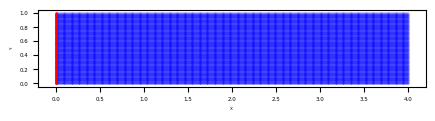

Constructor: IntegrationLoss  trapezoidal  in  2  dimension 
Iter: 1 Loss: 8.421408653e+00 Energy: 8.421408653e+00 Boundary: 0.000000000e+00 Time: 1.293e-01
Iter: 1 Loss: 6.492722511e+00 Energy: 6.492722511e+00 Boundary: 0.000000000e+00 Time: 1.229e-01
Iter: 1 Loss: 6.148252010e+00 Energy: 6.148252010e+00 Boundary: 0.000000000e+00 Time: 1.166e-01
Iter: 1 Loss: 5.610467434e+00 Energy: 5.610467434e+00 Boundary: 0.000000000e+00 Time: 1.172e-01
Iter: 1 Loss: 4.928643703e+00 Energy: 4.928643703e+00 Boundary: 0.000000000e+00 Time: 1.166e-01
Iter: 1 Loss: 4.168309212e+00 Energy: 4.168309212e+00 Boundary: 0.000000000e+00 Time: 1.254e-01
Iter: 1 Loss: 3.394860744e+00 Energy: 3.394860744e+00 Boundary: 0.000000000e+00 Time: 1.212e-01
Iter: 1 Loss: 2.661716938e+00 Energy: 2.661716938e+00 Boundary: 0.000000000e+00 Time: 1.271e-01
Iter: 1 Loss: 2.005791187e+00 Energy: 2.005791187e+00 Boundary: 0.000000000e+00 Time: 1.003e-01
Iter: 1 Loss: 1.443256974e+00 Energy: 1.443256974e+00 Boundary: 0.000000000

Iter: 2 Loss: -1.299162149e+00 Energy: -1.299162149e+00 Boundary: 0.000000000e+00 Time: 7.627e-02
Iter: 2 Loss: -1.304544210e+00 Energy: -1.304544210e+00 Boundary: 0.000000000e+00 Time: 7.762e-02
Iter: 2 Loss: -1.310034633e+00 Energy: -1.310034633e+00 Boundary: 0.000000000e+00 Time: 7.664e-02
Iter: 2 Loss: -1.316161156e+00 Energy: -1.316161156e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 2 Loss: -1.322128057e+00 Energy: -1.322128057e+00 Boundary: 0.000000000e+00 Time: 7.715e-02
Iter: 2 Loss: -1.329089642e+00 Energy: -1.329089642e+00 Boundary: 0.000000000e+00 Time: 7.663e-02
Iter: 2 Loss: -1.335991859e+00 Energy: -1.335991859e+00 Boundary: 0.000000000e+00 Time: 8.127e-02
Iter: 2 Loss: -1.344135523e+00 Energy: -1.344135523e+00 Boundary: 0.000000000e+00 Time: 7.631e-02
Iter: 2 Loss: -1.352540970e+00 Energy: -1.352540970e+00 Boundary: 0.000000000e+00 Time: 7.641e-02
Iter: 2 Loss: -1.362423778e+00 Energy: -1.362423778e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 2 Loss: -1.372

Iter: 4 Loss: -1.980577469e+00 Energy: -1.980577469e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 4 Loss: -1.983711004e+00 Energy: -1.983711004e+00 Boundary: 0.000000000e+00 Time: 7.721e-02
Iter: 4 Loss: -1.986504793e+00 Energy: -1.986504793e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 4 Loss: -1.988880873e+00 Energy: -1.988880873e+00 Boundary: 0.000000000e+00 Time: 8.010e-02
Iter: 4 Loss: -1.991074920e+00 Energy: -1.991074920e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 4 Loss: -1.992881775e+00 Energy: -1.992881775e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 4 Loss: -1.994485021e+00 Energy: -1.994485021e+00 Boundary: 0.000000000e+00 Time: 8.020e-02
Iter: 4 Loss: -1.995895982e+00 Energy: -1.995895982e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 4 Loss: -1.997177005e+00 Energy: -1.997177005e+00 Boundary: 0.000000000e+00 Time: 7.725e-02
Iter: 4 Loss: -1.998353362e+00 Energy: -1.998353362e+00 Boundary: 0.000000000e+00 Time: 8.064e-02
Iter: 4 Loss: -1.999

Iter: 6 Loss: -2.031173229e+00 Energy: -2.031173229e+00 Boundary: 0.000000000e+00 Time: 8.024e-02
Iter: 6 Loss: -2.031211853e+00 Energy: -2.031211853e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 6 Loss: -2.031250000e+00 Energy: -2.031250000e+00 Boundary: 0.000000000e+00 Time: 7.678e-02
Iter: 6 Loss: -2.031288624e+00 Energy: -2.031288624e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 6 Loss: -2.031333447e+00 Energy: -2.031333447e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 6 Loss: -2.031377077e+00 Energy: -2.031377077e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 6 Loss: -2.031424761e+00 Energy: -2.031424761e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 6 Loss: -2.031469584e+00 Energy: -2.031469584e+00 Boundary: 0.000000000e+00 Time: 7.725e-02
Iter: 6 Loss: -2.031515121e+00 Energy: -2.031515121e+00 Boundary: 0.000000000e+00 Time: 8.401e-02
Iter: 6 Loss: -2.031559944e+00 Energy: -2.031559944e+00 Boundary: 0.000000000e+00 Time: 8.403e-02
Iter: 6 Loss: -2.031

Iter: 7 Loss: -2.034909010e+00 Energy: -2.034909010e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 7 Loss: -2.034931660e+00 Energy: -2.034931660e+00 Boundary: 0.000000000e+00 Time: 8.008e-02
Iter: 7 Loss: -2.034958124e+00 Energy: -2.034958124e+00 Boundary: 0.000000000e+00 Time: 8.007e-02
Iter: 7 Loss: -2.034990311e+00 Energy: -2.034990311e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 7 Loss: -2.035024643e+00 Energy: -2.035024643e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 7 Loss: -2.035063744e+00 Energy: -2.035063744e+00 Boundary: 0.000000000e+00 Time: 7.665e-02
Iter: 7 Loss: -2.035109997e+00 Energy: -2.035109997e+00 Boundary: 0.000000000e+00 Time: 8.043e-02
Iter: 7 Loss: -2.035163164e+00 Energy: -2.035163164e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 7 Loss: -2.035224199e+00 Energy: -2.035224199e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 7 Loss: -2.035295010e+00 Energy: -2.035295010e+00 Boundary: 0.000000000e+00 Time: 8.173e-02
Iter: 7 Loss: -2.035

Iter: 9 Loss: -2.039382458e+00 Energy: -2.039382458e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 9 Loss: -2.039477110e+00 Energy: -2.039477110e+00 Boundary: 0.000000000e+00 Time: 8.404e-02
Iter: 9 Loss: -2.039588213e+00 Energy: -2.039588213e+00 Boundary: 0.000000000e+00 Time: 8.022e-02
Iter: 9 Loss: -2.039691925e+00 Energy: -2.039691925e+00 Boundary: 0.000000000e+00 Time: 8.102e-02
Iter: 9 Loss: -2.039816380e+00 Energy: -2.039816380e+00 Boundary: 0.000000000e+00 Time: 8.022e-02
Iter: 9 Loss: -2.039929390e+00 Energy: -2.039929390e+00 Boundary: 0.000000000e+00 Time: 7.797e-02
Iter: 9 Loss: -2.040061712e+00 Energy: -2.040061712e+00 Boundary: 0.000000000e+00 Time: 8.022e-02
Iter: 9 Loss: -2.040212154e+00 Energy: -2.040212154e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 9 Loss: -2.040349483e+00 Energy: -2.040349483e+00 Boundary: 0.000000000e+00 Time: 8.039e-02
Iter: 9 Loss: -2.040507317e+00 Energy: -2.040507317e+00 Boundary: 0.000000000e+00 Time: 8.064e-02
Iter: 9 Loss: -2.040

Iter: 11 Loss: -2.091192007e+00 Energy: -2.091192007e+00 Boundary: 0.000000000e+00 Time: 8.013e-02
Iter: 11 Loss: -2.091402531e+00 Energy: -2.091402531e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 11 Loss: -2.091622829e+00 Energy: -2.091622829e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 11 Loss: -2.091857433e+00 Energy: -2.091857433e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 11 Loss: -2.092091560e+00 Energy: -2.092091560e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 11 Loss: -2.092348576e+00 Energy: -2.092348576e+00 Boundary: 0.000000000e+00 Time: 7.606e-02
Iter: 11 Loss: -2.092614651e+00 Energy: -2.092614651e+00 Boundary: 0.000000000e+00 Time: 8.013e-02
Iter: 11 Loss: -2.092884779e+00 Energy: -2.092884779e+00 Boundary: 0.000000000e+00 Time: 8.224e-02
Iter: 11 Loss: -2.093175888e+00 Energy: -2.093175888e+00 Boundary: 0.000000000e+00 Time: 7.249e-02
Iter: 11 Loss: -2.093467951e+00 Energy: -2.093467951e+00 Boundary: 0.000000000e+00 Time: 7.738e-02
Iter: 11 L

Iter: 12 Loss: -2.122754097e+00 Energy: -2.122754097e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 12 Loss: -2.122803926e+00 Energy: -2.122803926e+00 Boundary: 0.000000000e+00 Time: 7.643e-02
Iter: 12 Loss: -2.122845411e+00 Energy: -2.122845411e+00 Boundary: 0.000000000e+00 Time: 7.699e-02
Iter: 12 Loss: -2.122882605e+00 Energy: -2.122882605e+00 Boundary: 0.000000000e+00 Time: 8.540e-02
Iter: 12 Loss: -2.122917175e+00 Energy: -2.122917175e+00 Boundary: 0.000000000e+00 Time: 8.059e-02
Iter: 12 Loss: -2.122947931e+00 Energy: -2.122947931e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 12 Loss: -2.122975111e+00 Energy: -2.122975111e+00 Boundary: 0.000000000e+00 Time: 7.708e-02
Iter: 12 Loss: -2.123001099e+00 Energy: -2.123001099e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 12 Loss: -2.123027802e+00 Energy: -2.123027802e+00 Boundary: 0.000000000e+00 Time: 7.604e-02
Iter: 13 Loss: -2.123049021e+00 Energy: -2.123049021e+00 Boundary: 0.000000000e+00 Time: 8.060e-02
Iter: 13 L

Iter: 14 Loss: -2.130859375e+00 Energy: -2.130859375e+00 Boundary: 0.000000000e+00 Time: 8.100e-02
Iter: 14 Loss: -2.130873442e+00 Energy: -2.130873442e+00 Boundary: 0.000000000e+00 Time: 8.080e-02
Iter: 14 Loss: -2.130889177e+00 Energy: -2.130889177e+00 Boundary: 0.000000000e+00 Time: 7.626e-02
Iter: 14 Loss: -2.130908012e+00 Energy: -2.130908012e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 14 Loss: -2.130925655e+00 Energy: -2.130925655e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 14 Loss: -2.130945921e+00 Energy: -2.130945921e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 14 Loss: -2.130964756e+00 Energy: -2.130964756e+00 Boundary: 0.000000000e+00 Time: 8.019e-02
Iter: 14 Loss: -2.130982876e+00 Energy: -2.130982876e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 14 Loss: -2.131010056e+00 Energy: -2.131010056e+00 Boundary: 0.000000000e+00 Time: 7.609e-02
Iter: 14 Loss: -2.131048441e+00 Energy: -2.131048441e+00 Boundary: 0.000000000e+00 Time: 8.032e-02
Iter: 14 L

Iter: 16 Loss: -2.137385130e+00 Energy: -2.137385130e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 16 Loss: -2.137443781e+00 Energy: -2.137443781e+00 Boundary: 0.000000000e+00 Time: 8.403e-02
Iter: 16 Loss: -2.137507439e+00 Energy: -2.137507439e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 16 Loss: -2.137579679e+00 Energy: -2.137579679e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 16 Loss: -2.137656689e+00 Energy: -2.137656689e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 16 Loss: -2.137740135e+00 Energy: -2.137740135e+00 Boundary: 0.000000000e+00 Time: 7.691e-02
Iter: 16 Loss: -2.137825966e+00 Energy: -2.137825966e+00 Boundary: 0.000000000e+00 Time: 8.046e-02
Iter: 16 Loss: -2.137920141e+00 Energy: -2.137920141e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 16 Loss: -2.138019085e+00 Energy: -2.138019085e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 16 Loss: -2.138118982e+00 Energy: -2.138118982e+00 Boundary: 0.000000000e+00 Time: 8.046e-02
Iter: 16 L

Iter: 17 Loss: -2.142874241e+00 Energy: -2.142874241e+00 Boundary: 0.000000000e+00 Time: 8.496e-02
Iter: 17 Loss: -2.143030167e+00 Energy: -2.143030167e+00 Boundary: 0.000000000e+00 Time: 7.674e-02
Iter: 17 Loss: -2.143179893e+00 Energy: -2.143179893e+00 Boundary: 0.000000000e+00 Time: 7.678e-02
Iter: 17 Loss: -2.143308640e+00 Energy: -2.143308640e+00 Boundary: 0.000000000e+00 Time: 8.090e-02
Iter: 17 Loss: -2.143424988e+00 Energy: -2.143424988e+00 Boundary: 0.000000000e+00 Time: 7.743e-02
Iter: 17 Loss: -2.143524885e+00 Energy: -2.143524885e+00 Boundary: 0.000000000e+00 Time: 8.104e-02
Iter: 17 Loss: -2.143621683e+00 Energy: -2.143621683e+00 Boundary: 0.000000000e+00 Time: 8.012e-02
Iter: 18 Loss: -2.143706799e+00 Energy: -2.143706799e+00 Boundary: 0.000000000e+00 Time: 8.440e-02
Iter: 18 Loss: -2.143786669e+00 Energy: -2.143786669e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 18 Loss: -2.143865824e+00 Energy: -2.143865824e+00 Boundary: 0.000000000e+00 Time: 8.186e-02
Iter: 18 L

Iter: 19 Loss: -2.147095919e+00 Energy: -2.147095919e+00 Boundary: 0.000000000e+00 Time: 8.123e-02
Iter: 19 Loss: -2.147103548e+00 Energy: -2.147103548e+00 Boundary: 0.000000000e+00 Time: 7.317e-02
Iter: 19 Loss: -2.147117138e+00 Energy: -2.147117138e+00 Boundary: 0.000000000e+00 Time: 7.608e-02
Iter: 19 Loss: -2.147125483e+00 Energy: -2.147125483e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 19 Loss: -2.147132158e+00 Energy: -2.147132158e+00 Boundary: 0.000000000e+00 Time: 7.606e-02
Iter: 19 Loss: -2.147138834e+00 Energy: -2.147138834e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 19 Loss: -2.147153378e+00 Energy: -2.147153378e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 19 Loss: -2.147155523e+00 Energy: -2.147155523e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 19 Loss: -2.147162437e+00 Energy: -2.147162437e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 19 Loss: -2.147170067e+00 Energy: -2.147170067e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 19 L

Iter: 21 Loss: -2.148930073e+00 Energy: -2.148930073e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 21 Loss: -2.148956299e+00 Energy: -2.148956299e+00 Boundary: 0.000000000e+00 Time: 7.645e-02
Iter: 21 Loss: -2.148979902e+00 Energy: -2.148979902e+00 Boundary: 0.000000000e+00 Time: 8.064e-02
Iter: 21 Loss: -2.149001837e+00 Energy: -2.149001837e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 21 Loss: -2.149024248e+00 Energy: -2.149024248e+00 Boundary: 0.000000000e+00 Time: 7.601e-02
Iter: 21 Loss: -2.149044514e+00 Energy: -2.149044514e+00 Boundary: 0.000000000e+00 Time: 7.604e-02
Iter: 21 Loss: -2.149068832e+00 Energy: -2.149068832e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 21 Loss: -2.149086952e+00 Energy: -2.149086952e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 21 Loss: -2.149111032e+00 Energy: -2.149111032e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 21 Loss: -2.149131298e+00 Energy: -2.149131298e+00 Boundary: 0.000000000e+00 Time: 8.040e-02
Iter: 21 L

Iter: 22 Loss: -2.150780201e+00 Energy: -2.150780201e+00 Boundary: 0.000000000e+00 Time: 8.075e-02
Iter: 22 Loss: -2.150796413e+00 Energy: -2.150796413e+00 Boundary: 0.000000000e+00 Time: 8.058e-02
Iter: 22 Loss: -2.150816202e+00 Energy: -2.150816202e+00 Boundary: 0.000000000e+00 Time: 8.079e-02
Iter: 22 Loss: -2.150830984e+00 Energy: -2.150830984e+00 Boundary: 0.000000000e+00 Time: 8.059e-02
Iter: 22 Loss: -2.150854111e+00 Energy: -2.150854111e+00 Boundary: 0.000000000e+00 Time: 7.666e-02
Iter: 23 Loss: -2.150871038e+00 Energy: -2.150871038e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 23 Loss: -2.150887966e+00 Energy: -2.150887966e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 23 Loss: -2.150905132e+00 Energy: -2.150905132e+00 Boundary: 0.000000000e+00 Time: 7.675e-02
Iter: 23 Loss: -2.150920391e+00 Energy: -2.150920391e+00 Boundary: 0.000000000e+00 Time: 8.055e-02
Iter: 23 Loss: -2.150938034e+00 Energy: -2.150938034e+00 Boundary: 0.000000000e+00 Time: 8.131e-02
Iter: 23 L

Iter: 24 Loss: -2.152632475e+00 Energy: -2.152632475e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 24 Loss: -2.152654409e+00 Energy: -2.152654409e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 24 Loss: -2.152672529e+00 Energy: -2.152672529e+00 Boundary: 0.000000000e+00 Time: 8.066e-02
Iter: 24 Loss: -2.152692556e+00 Energy: -2.152692556e+00 Boundary: 0.000000000e+00 Time: 8.221e-02
Iter: 24 Loss: -2.152719498e+00 Energy: -2.152719498e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 24 Loss: -2.152735472e+00 Energy: -2.152735472e+00 Boundary: 0.000000000e+00 Time: 8.087e-02
Iter: 24 Loss: -2.152763128e+00 Energy: -2.152763128e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 24 Loss: -2.152783871e+00 Energy: -2.152783871e+00 Boundary: 0.000000000e+00 Time: 8.019e-02
Iter: 24 Loss: -2.152804613e+00 Energy: -2.152804613e+00 Boundary: 0.000000000e+00 Time: 7.740e-02
Iter: 24 Loss: -2.152831316e+00 Energy: -2.152831316e+00 Boundary: 0.000000000e+00 Time: 7.716e-02
Iter: 24 L

Iter: 26 Loss: -2.154446125e+00 Energy: -2.154446125e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 26 Loss: -2.154477596e+00 Energy: -2.154477596e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 26 Loss: -2.154516697e+00 Energy: -2.154516697e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 26 Loss: -2.154546261e+00 Energy: -2.154546261e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 26 Loss: -2.154577971e+00 Energy: -2.154577971e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 26 Loss: -2.154610395e+00 Energy: -2.154610395e+00 Boundary: 0.000000000e+00 Time: 7.690e-02
Iter: 26 Loss: -2.154646397e+00 Energy: -2.154646397e+00 Boundary: 0.000000000e+00 Time: 8.421e-02
Iter: 26 Loss: -2.154677868e+00 Energy: -2.154677868e+00 Boundary: 0.000000000e+00 Time: 8.005e-02
Iter: 26 Loss: -2.154709816e+00 Energy: -2.154709816e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 26 Loss: -2.154741764e+00 Energy: -2.154741764e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 26 L

Iter: 27 Loss: -2.157619715e+00 Energy: -2.157619715e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 27 Loss: -2.157757521e+00 Energy: -2.157757521e+00 Boundary: 0.000000000e+00 Time: 8.088e-02
Iter: 27 Loss: -2.157904625e+00 Energy: -2.157904625e+00 Boundary: 0.000000000e+00 Time: 7.729e-02
Iter: 28 Loss: -2.158112526e+00 Energy: -2.158112526e+00 Boundary: 0.000000000e+00 Time: 8.160e-02
Iter: 28 Loss: -2.158299923e+00 Energy: -2.158299923e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 28 Loss: -2.158476114e+00 Energy: -2.158476114e+00 Boundary: 0.000000000e+00 Time: 7.691e-02
Iter: 28 Loss: -2.158612967e+00 Energy: -2.158612967e+00 Boundary: 0.000000000e+00 Time: 7.714e-02
Iter: 28 Loss: -2.158819437e+00 Energy: -2.158819437e+00 Boundary: 0.000000000e+00 Time: 7.611e-02
Iter: 28 Loss: -2.158998728e+00 Energy: -2.158998728e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 28 Loss: -2.159188509e+00 Energy: -2.159188509e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 28 L

Iter: 29 Loss: -2.168292522e+00 Energy: -2.168292522e+00 Boundary: 0.000000000e+00 Time: 8.059e-02
Iter: 29 Loss: -2.168380976e+00 Energy: -2.168380976e+00 Boundary: 0.000000000e+00 Time: 7.605e-02
Iter: 29 Loss: -2.168459177e+00 Energy: -2.168459177e+00 Boundary: 0.000000000e+00 Time: 8.058e-02
Iter: 29 Loss: -2.168534279e+00 Energy: -2.168534279e+00 Boundary: 0.000000000e+00 Time: 7.717e-02
Iter: 29 Loss: -2.168595791e+00 Energy: -2.168595791e+00 Boundary: 0.000000000e+00 Time: 7.610e-02
Iter: 29 Loss: -2.168665171e+00 Energy: -2.168665171e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 29 Loss: -2.168733835e+00 Energy: -2.168733835e+00 Boundary: 0.000000000e+00 Time: 8.105e-02
Iter: 29 Loss: -2.168791533e+00 Energy: -2.168791533e+00 Boundary: 0.000000000e+00 Time: 8.019e-02
Iter: 29 Loss: -2.168853998e+00 Energy: -2.168853998e+00 Boundary: 0.000000000e+00 Time: 7.713e-02
Iter: 29 Loss: -2.168913126e+00 Energy: -2.168913126e+00 Boundary: 0.000000000e+00 Time: 8.052e-02
Iter: 29 L

Iter: 31 Loss: -2.172630787e+00 Energy: -2.172630787e+00 Boundary: 0.000000000e+00 Time: 8.051e-02
Iter: 31 Loss: -2.172788858e+00 Energy: -2.172788858e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 31 Loss: -2.172975063e+00 Energy: -2.172975063e+00 Boundary: 0.000000000e+00 Time: 7.601e-02
Iter: 31 Loss: -2.173150778e+00 Energy: -2.173150778e+00 Boundary: 0.000000000e+00 Time: 7.670e-02
Iter: 31 Loss: -2.173322678e+00 Energy: -2.173322678e+00 Boundary: 0.000000000e+00 Time: 7.610e-02
Iter: 31 Loss: -2.173510075e+00 Energy: -2.173510075e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 31 Loss: -2.173699856e+00 Energy: -2.173699856e+00 Boundary: 0.000000000e+00 Time: 8.040e-02
Iter: 31 Loss: -2.173897505e+00 Energy: -2.173897505e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 31 Loss: -2.174117327e+00 Energy: -2.174117327e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 31 Loss: -2.174341679e+00 Energy: -2.174341679e+00 Boundary: 0.000000000e+00 Time: 7.723e-02
Iter: 31 L

Iter: 32 Loss: -2.187678337e+00 Energy: -2.187678337e+00 Boundary: 0.000000000e+00 Time: 8.035e-02
Iter: 33 Loss: -2.187789917e+00 Energy: -2.187789917e+00 Boundary: 0.000000000e+00 Time: 8.098e-02
Iter: 33 Loss: -2.187896252e+00 Energy: -2.187896252e+00 Boundary: 0.000000000e+00 Time: 8.030e-02
Iter: 33 Loss: -2.187985659e+00 Energy: -2.187985659e+00 Boundary: 0.000000000e+00 Time: 8.026e-02
Iter: 33 Loss: -2.188074589e+00 Energy: -2.188074589e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 33 Loss: -2.188158512e+00 Energy: -2.188158512e+00 Boundary: 0.000000000e+00 Time: 7.686e-02
Iter: 33 Loss: -2.188230276e+00 Energy: -2.188230276e+00 Boundary: 0.000000000e+00 Time: 7.744e-02
Iter: 33 Loss: -2.188299894e+00 Energy: -2.188299894e+00 Boundary: 0.000000000e+00 Time: 7.515e-02
Iter: 33 Loss: -2.188363791e+00 Energy: -2.188363791e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 33 Loss: -2.188417435e+00 Energy: -2.188417435e+00 Boundary: 0.000000000e+00 Time: 8.041e-02
Iter: 33 L

Iter: 34 Loss: -2.195741415e+00 Energy: -2.195741415e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 34 Loss: -2.195837498e+00 Energy: -2.195837498e+00 Boundary: 0.000000000e+00 Time: 8.403e-02
Iter: 34 Loss: -2.195904970e+00 Energy: -2.195904970e+00 Boundary: 0.000000000e+00 Time: 8.100e-02
Iter: 34 Loss: -2.195978403e+00 Energy: -2.195978403e+00 Boundary: 0.000000000e+00 Time: 8.156e-02
Iter: 34 Loss: -2.196042776e+00 Energy: -2.196042776e+00 Boundary: 0.000000000e+00 Time: 8.044e-02
Iter: 34 Loss: -2.196114302e+00 Energy: -2.196114302e+00 Boundary: 0.000000000e+00 Time: 7.601e-02
Iter: 34 Loss: -2.196185112e+00 Energy: -2.196185112e+00 Boundary: 0.000000000e+00 Time: 8.057e-02
Iter: 34 Loss: -2.196252346e+00 Energy: -2.196252346e+00 Boundary: 0.000000000e+00 Time: 8.064e-02
Iter: 34 Loss: -2.196319342e+00 Energy: -2.196319342e+00 Boundary: 0.000000000e+00 Time: 8.222e-02
Iter: 34 Loss: -2.196391582e+00 Energy: -2.196391582e+00 Boundary: 0.000000000e+00 Time: 8.313e-02
Iter: 34 L

Iter: 36 Loss: -2.210375309e+00 Energy: -2.210375309e+00 Boundary: 0.000000000e+00 Time: 8.040e-02
Iter: 36 Loss: -2.210629702e+00 Energy: -2.210629702e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 36 Loss: -2.210859060e+00 Energy: -2.210859060e+00 Boundary: 0.000000000e+00 Time: 8.044e-02
Iter: 36 Loss: -2.211072922e+00 Energy: -2.211072922e+00 Boundary: 0.000000000e+00 Time: 8.401e-02
Iter: 36 Loss: -2.211282015e+00 Energy: -2.211282015e+00 Boundary: 0.000000000e+00 Time: 7.703e-02
Iter: 36 Loss: -2.211492300e+00 Energy: -2.211492300e+00 Boundary: 0.000000000e+00 Time: 7.606e-02
Iter: 36 Loss: -2.211686850e+00 Energy: -2.211686850e+00 Boundary: 0.000000000e+00 Time: 8.044e-02
Iter: 36 Loss: -2.211878300e+00 Energy: -2.211878300e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 36 Loss: -2.212045431e+00 Energy: -2.212045431e+00 Boundary: 0.000000000e+00 Time: 7.741e-02
Iter: 36 Loss: -2.212197781e+00 Energy: -2.212197781e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 36 L

Iter: 38 Loss: -2.218071938e+00 Energy: -2.218071938e+00 Boundary: 0.000000000e+00 Time: 7.718e-02
Iter: 38 Loss: -2.218124390e+00 Energy: -2.218124390e+00 Boundary: 0.000000000e+00 Time: 7.666e-02
Iter: 38 Loss: -2.218169212e+00 Energy: -2.218169212e+00 Boundary: 0.000000000e+00 Time: 8.019e-02
Iter: 38 Loss: -2.218214989e+00 Energy: -2.218214989e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 38 Loss: -2.218259335e+00 Energy: -2.218259335e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 38 Loss: -2.218301058e+00 Energy: -2.218301058e+00 Boundary: 0.000000000e+00 Time: 7.685e-02
Iter: 38 Loss: -2.218348980e+00 Energy: -2.218348980e+00 Boundary: 0.000000000e+00 Time: 8.020e-02
Iter: 38 Loss: -2.218394518e+00 Energy: -2.218394518e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 38 Loss: -2.218438864e+00 Energy: -2.218438864e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 38 Loss: -2.218493462e+00 Energy: -2.218493462e+00 Boundary: 0.000000000e+00 Time: 8.055e-02
Iter: 38 L

Iter: 39 Loss: -2.223140717e+00 Energy: -2.223140717e+00 Boundary: 0.000000000e+00 Time: 9.003e-02
Iter: 39 Loss: -2.223166704e+00 Energy: -2.223166704e+00 Boundary: 0.000000000e+00 Time: 8.092e-02
Iter: 39 Loss: -2.223191500e+00 Energy: -2.223191500e+00 Boundary: 0.000000000e+00 Time: 7.702e-02
Iter: 39 Loss: -2.223214626e+00 Energy: -2.223214626e+00 Boundary: 0.000000000e+00 Time: 8.064e-02
Iter: 39 Loss: -2.223233461e+00 Energy: -2.223233461e+00 Boundary: 0.000000000e+00 Time: 8.071e-02
Iter: 39 Loss: -2.223260641e+00 Energy: -2.223260641e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 39 Loss: -2.223284483e+00 Energy: -2.223284483e+00 Boundary: 0.000000000e+00 Time: 8.016e-02
Iter: 39 Loss: -2.223302364e+00 Energy: -2.223302364e+00 Boundary: 0.000000000e+00 Time: 9.620e-02
Iter: 39 Loss: -2.223327637e+00 Energy: -2.223327637e+00 Boundary: 0.000000000e+00 Time: 9.171e-02
Iter: 39 Loss: -2.223350525e+00 Energy: -2.223350525e+00 Boundary: 0.000000000e+00 Time: 9.953e-02
Iter: 39 L

Iter: 41 Loss: -2.226984978e+00 Energy: -2.226984978e+00 Boundary: 0.000000000e+00 Time: 8.988e-02
Iter: 41 Loss: -2.227046013e+00 Energy: -2.227046013e+00 Boundary: 0.000000000e+00 Time: 8.079e-02
Iter: 41 Loss: -2.227098942e+00 Energy: -2.227098942e+00 Boundary: 0.000000000e+00 Time: 9.454e-02
Iter: 41 Loss: -2.227160692e+00 Energy: -2.227160692e+00 Boundary: 0.000000000e+00 Time: 9.056e-02
Iter: 41 Loss: -2.227210760e+00 Energy: -2.227210760e+00 Boundary: 0.000000000e+00 Time: 8.463e-02
Iter: 41 Loss: -2.227264404e+00 Energy: -2.227264404e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 41 Loss: -2.227332592e+00 Energy: -2.227332592e+00 Boundary: 0.000000000e+00 Time: 8.050e-02
Iter: 41 Loss: -2.227380991e+00 Energy: -2.227380991e+00 Boundary: 0.000000000e+00 Time: 7.677e-02
Iter: 41 Loss: -2.227439880e+00 Energy: -2.227439880e+00 Boundary: 0.000000000e+00 Time: 8.047e-02
Iter: 41 Loss: -2.227498293e+00 Energy: -2.227498293e+00 Boundary: 0.000000000e+00 Time: 8.080e-02
Iter: 41 L

Iter: 43 Loss: -2.230519772e+00 Energy: -2.230519772e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 43 Loss: -2.230576992e+00 Energy: -2.230576992e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 43 Loss: -2.230646372e+00 Energy: -2.230646372e+00 Boundary: 0.000000000e+00 Time: 7.623e-02
Iter: 43 Loss: -2.230707407e+00 Energy: -2.230707407e+00 Boundary: 0.000000000e+00 Time: 8.074e-02
Iter: 43 Loss: -2.230775356e+00 Energy: -2.230775356e+00 Boundary: 0.000000000e+00 Time: 7.693e-02
Iter: 43 Loss: -2.230834246e+00 Energy: -2.230834246e+00 Boundary: 0.000000000e+00 Time: 7.601e-02
Iter: 43 Loss: -2.230878115e+00 Energy: -2.230878115e+00 Boundary: 0.000000000e+00 Time: 8.039e-02
Iter: 43 Loss: -2.230926037e+00 Energy: -2.230926037e+00 Boundary: 0.000000000e+00 Time: 7.654e-02
Iter: 43 Loss: -2.230975628e+00 Energy: -2.230975628e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 43 Loss: -2.231017113e+00 Energy: -2.231017113e+00 Boundary: 0.000000000e+00 Time: 7.646e-02
Iter: 43 L

Iter: 44 Loss: -2.233227253e+00 Energy: -2.233227253e+00 Boundary: 0.000000000e+00 Time: 8.401e-02
Iter: 44 Loss: -2.233256817e+00 Energy: -2.233256817e+00 Boundary: 0.000000000e+00 Time: 8.097e-02
Iter: 44 Loss: -2.233287334e+00 Energy: -2.233287334e+00 Boundary: 0.000000000e+00 Time: 7.601e-02
Iter: 44 Loss: -2.233320236e+00 Energy: -2.233320236e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 44 Loss: -2.233353853e+00 Energy: -2.233353853e+00 Boundary: 0.000000000e+00 Time: 8.102e-02
Iter: 44 Loss: -2.233388662e+00 Energy: -2.233388662e+00 Boundary: 0.000000000e+00 Time: 8.054e-02
Iter: 44 Loss: -2.233429432e+00 Energy: -2.233429432e+00 Boundary: 0.000000000e+00 Time: 8.062e-02
Iter: 44 Loss: -2.233460426e+00 Energy: -2.233460426e+00 Boundary: 0.000000000e+00 Time: 8.012e-02
Iter: 44 Loss: -2.233506203e+00 Energy: -2.233506203e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 44 Loss: -2.233535767e+00 Energy: -2.233535767e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 44 L

Iter: 46 Loss: -2.235529661e+00 Energy: -2.235529661e+00 Boundary: 0.000000000e+00 Time: 8.445e-02
Iter: 46 Loss: -2.235556364e+00 Energy: -2.235556364e+00 Boundary: 0.000000000e+00 Time: 8.041e-02
Iter: 46 Loss: -2.235587120e+00 Energy: -2.235587120e+00 Boundary: 0.000000000e+00 Time: 7.664e-02
Iter: 46 Loss: -2.235617161e+00 Energy: -2.235617161e+00 Boundary: 0.000000000e+00 Time: 8.098e-02
Iter: 46 Loss: -2.235643864e+00 Energy: -2.235643864e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 46 Loss: -2.235668898e+00 Energy: -2.235668898e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 46 Loss: -2.235689878e+00 Energy: -2.235689878e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 46 Loss: -2.235710621e+00 Energy: -2.235710621e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 46 Loss: -2.235728741e+00 Energy: -2.235728741e+00 Boundary: 0.000000000e+00 Time: 8.044e-02
Iter: 46 Loss: -2.235747337e+00 Energy: -2.235747337e+00 Boundary: 0.000000000e+00 Time: 8.032e-02
Iter: 46 L

Iter: 48 Loss: -2.237299919e+00 Energy: -2.237299919e+00 Boundary: 0.000000000e+00 Time: 8.113e-02
Iter: 48 Loss: -2.237316132e+00 Energy: -2.237316132e+00 Boundary: 0.000000000e+00 Time: 7.601e-02
Iter: 48 Loss: -2.237335205e+00 Energy: -2.237335205e+00 Boundary: 0.000000000e+00 Time: 8.059e-02
Iter: 48 Loss: -2.237353086e+00 Energy: -2.237353086e+00 Boundary: 0.000000000e+00 Time: 8.026e-02
Iter: 48 Loss: -2.237375975e+00 Energy: -2.237375975e+00 Boundary: 0.000000000e+00 Time: 8.084e-02
Iter: 48 Loss: -2.237401724e+00 Energy: -2.237401724e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 48 Loss: -2.237428665e+00 Energy: -2.237428665e+00 Boundary: 0.000000000e+00 Time: 8.401e-02
Iter: 48 Loss: -2.237450600e+00 Energy: -2.237450600e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 48 Loss: -2.237473488e+00 Energy: -2.237473488e+00 Boundary: 0.000000000e+00 Time: 8.134e-02
Iter: 48 Loss: -2.237499952e+00 Energy: -2.237499952e+00 Boundary: 0.000000000e+00 Time: 8.028e-02
Iter: 48 L

Iter: 49 Loss: -2.239041328e+00 Energy: -2.239041328e+00 Boundary: 0.000000000e+00 Time: 8.516e-02
Iter: 49 Loss: -2.239052773e+00 Energy: -2.239052773e+00 Boundary: 0.000000000e+00 Time: 8.123e-02
Iter: 49 Loss: -2.239062786e+00 Energy: -2.239062786e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 49 Loss: -2.239072800e+00 Energy: -2.239072800e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 49 Loss: -2.239083767e+00 Energy: -2.239083767e+00 Boundary: 0.000000000e+00 Time: 7.699e-02
Iter: 49 Loss: -2.239094496e+00 Energy: -2.239094496e+00 Boundary: 0.000000000e+00 Time: 8.404e-02
Iter: 49 Loss: -2.239108324e+00 Energy: -2.239108324e+00 Boundary: 0.000000000e+00 Time: 8.334e-02
Iter: 49 Loss: -2.239122629e+00 Energy: -2.239122629e+00 Boundary: 0.000000000e+00 Time: 7.410e-02
Iter: 49 Loss: -2.239135981e+00 Energy: -2.239135981e+00 Boundary: 0.000000000e+00 Time: 8.170e-02
Iter: 49 Loss: -2.239147186e+00 Energy: -2.239147186e+00 Boundary: 0.000000000e+00 Time: 8.618e-02
Iter: 49 L

In [13]:
L = 4
H = 1
E = 1000
nu = 0.3
N_H = 100
N_L = 400
t = [0, -12.5]
test_x = 500
test_y = 300

dem = TwoDBeam(L, H, E, nu, t, N_H, N_L, c=100, c1=630, c2=-1.2, epochs=50, num_test_x=test_x, num_test_y=test_y)
dem.train_model()

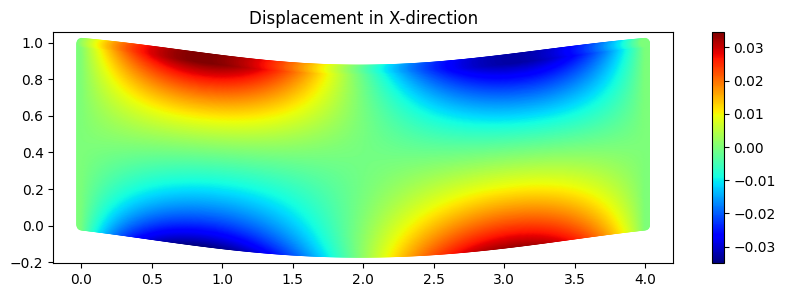

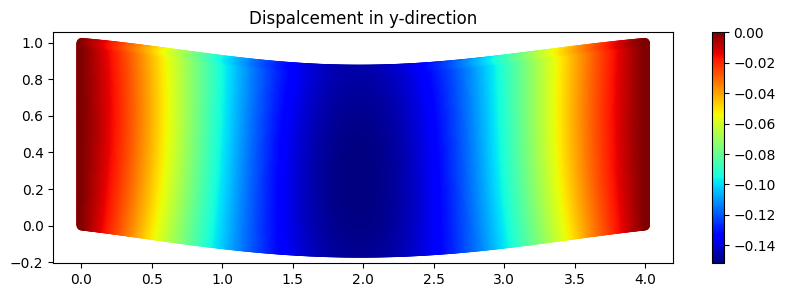

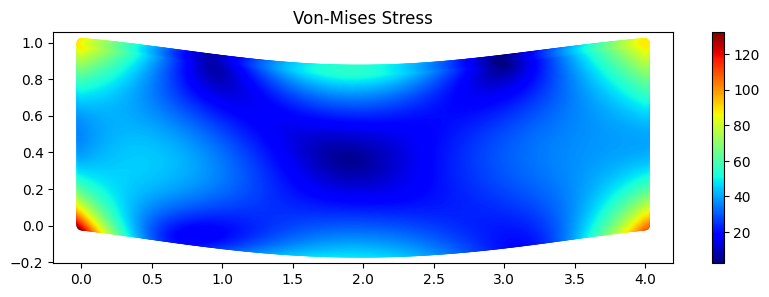

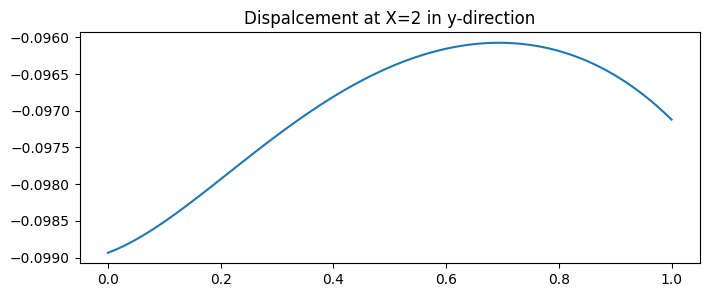

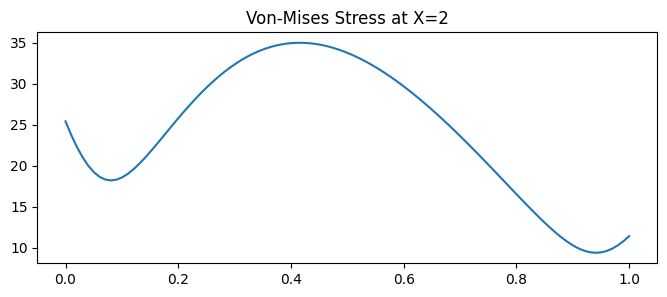

In [14]:
dem.plot_deformed_displacement()

(40000, 2)


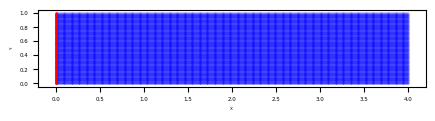

Constructor: IntegrationLoss  trapezoidal  in  2  dimension 
Iter: 1 Loss: 2.428305817e+01 Energy: 2.428305817e+01 Boundary: 0.000000000e+00 Time: 8.064e-02
Iter: 1 Loss: 1.846764374e+01 Energy: 1.846764374e+01 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 1 Loss: 1.614291763e+01 Energy: 1.614291763e+01 Boundary: 0.000000000e+00 Time: 8.033e-02
Iter: 1 Loss: 1.403061295e+01 Energy: 1.403061295e+01 Boundary: 0.000000000e+00 Time: 7.698e-02
Iter: 1 Loss: 1.213440514e+01 Energy: 1.213440514e+01 Boundary: 0.000000000e+00 Time: 7.604e-02
Iter: 1 Loss: 1.044432068e+01 Energy: 1.044432068e+01 Boundary: 0.000000000e+00 Time: 8.000e-02
Iter: 1 Loss: 8.944808960e+00 Energy: 8.944808960e+00 Boundary: 0.000000000e+00 Time: 8.088e-02
Iter: 1 Loss: 7.618479252e+00 Energy: 7.618479252e+00 Boundary: 0.000000000e+00 Time: 7.693e-02
Iter: 1 Loss: 6.448039532e+00 Energy: 6.448039532e+00 Boundary: 0.000000000e+00 Time: 8.139e-02
Iter: 1 Loss: 5.417191029e+00 Energy: 5.417191029e+00 Boundary: 0.000000000

Iter: 2 Loss: -1.334506750e+00 Energy: -1.334506750e+00 Boundary: 0.000000000e+00 Time: 8.023e-02
Iter: 2 Loss: -1.341897488e+00 Energy: -1.341897488e+00 Boundary: 0.000000000e+00 Time: 8.119e-02
Iter: 2 Loss: -1.350345731e+00 Energy: -1.350345731e+00 Boundary: 0.000000000e+00 Time: 8.060e-02
Iter: 2 Loss: -1.356509447e+00 Energy: -1.356509447e+00 Boundary: 0.000000000e+00 Time: 8.287e-02
Iter: 2 Loss: -1.363433838e+00 Energy: -1.363433838e+00 Boundary: 0.000000000e+00 Time: 8.605e-02
Iter: 2 Loss: -1.370996237e+00 Energy: -1.370996237e+00 Boundary: 0.000000000e+00 Time: 8.066e-02
Iter: 2 Loss: -1.380170226e+00 Energy: -1.380170226e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 2 Loss: -1.390966177e+00 Energy: -1.390966177e+00 Boundary: 0.000000000e+00 Time: 8.026e-02
Iter: 2 Loss: -1.403762460e+00 Energy: -1.403762460e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 2 Loss: -1.418325901e+00 Energy: -1.418325901e+00 Boundary: 0.000000000e+00 Time: 8.021e-02
Iter: 2 Loss: -1.435

Iter: 4 Loss: -1.942881346e+00 Energy: -1.942881346e+00 Boundary: 0.000000000e+00 Time: 8.803e-02
Iter: 4 Loss: -1.945617676e+00 Energy: -1.945617676e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 4 Loss: -1.948517919e+00 Energy: -1.948517919e+00 Boundary: 0.000000000e+00 Time: 8.049e-02
Iter: 4 Loss: -1.951513767e+00 Energy: -1.951513767e+00 Boundary: 0.000000000e+00 Time: 7.687e-02
Iter: 4 Loss: -1.955100298e+00 Energy: -1.955100298e+00 Boundary: 0.000000000e+00 Time: 8.113e-02
Iter: 4 Loss: -1.957809329e+00 Energy: -1.957809329e+00 Boundary: 0.000000000e+00 Time: 8.055e-02
Iter: 4 Loss: -1.960244894e+00 Energy: -1.960244894e+00 Boundary: 0.000000000e+00 Time: 8.069e-02
Iter: 4 Loss: -1.962675691e+00 Energy: -1.962675691e+00 Boundary: 0.000000000e+00 Time: 7.604e-02
Iter: 4 Loss: -1.964891195e+00 Energy: -1.964891195e+00 Boundary: 0.000000000e+00 Time: 8.076e-02
Iter: 4 Loss: -1.966918111e+00 Energy: -1.966918111e+00 Boundary: 0.000000000e+00 Time: 7.702e-02
Iter: 4 Loss: -1.968

Iter: 6 Loss: -2.025317430e+00 Energy: -2.025317430e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 6 Loss: -2.025397778e+00 Energy: -2.025397778e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 6 Loss: -2.025483131e+00 Energy: -2.025483131e+00 Boundary: 0.000000000e+00 Time: 8.403e-02
Iter: 6 Loss: -2.025574207e+00 Energy: -2.025574207e+00 Boundary: 0.000000000e+00 Time: 8.401e-02
Iter: 6 Loss: -2.025670528e+00 Energy: -2.025670528e+00 Boundary: 0.000000000e+00 Time: 7.778e-02
Iter: 6 Loss: -2.025769711e+00 Energy: -2.025769711e+00 Boundary: 0.000000000e+00 Time: 8.099e-02
Iter: 6 Loss: -2.025871992e+00 Energy: -2.025871992e+00 Boundary: 0.000000000e+00 Time: 8.039e-02
Iter: 6 Loss: -2.025978327e+00 Energy: -2.025978327e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 6 Loss: -2.026087761e+00 Energy: -2.026087761e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 6 Loss: -2.026198864e+00 Energy: -2.026198864e+00 Boundary: 0.000000000e+00 Time: 8.117e-02
Iter: 6 Loss: -2.026

Iter: 7 Loss: -2.031251907e+00 Energy: -2.031251907e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 7 Loss: -2.031266689e+00 Energy: -2.031266689e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 7 Loss: -2.031281948e+00 Energy: -2.031281948e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 7 Loss: -2.031300068e+00 Energy: -2.031300068e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 7 Loss: -2.031320572e+00 Energy: -2.031320572e+00 Boundary: 0.000000000e+00 Time: 7.419e-02
Iter: 7 Loss: -2.031345367e+00 Energy: -2.031345367e+00 Boundary: 0.000000000e+00 Time: 8.020e-02
Iter: 7 Loss: -2.031373024e+00 Energy: -2.031373024e+00 Boundary: 0.000000000e+00 Time: 8.066e-02
Iter: 7 Loss: -2.031407356e+00 Energy: -2.031407356e+00 Boundary: 0.000000000e+00 Time: 7.202e-02
Iter: 7 Loss: -2.031446695e+00 Energy: -2.031446695e+00 Boundary: 0.000000000e+00 Time: 8.138e-02
Iter: 7 Loss: -2.031502962e+00 Energy: -2.031502962e+00 Boundary: 0.000000000e+00 Time: 8.031e-02
Iter: 7 Loss: -2.031

Iter: 9 Loss: -2.038342953e+00 Energy: -2.038342953e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 9 Loss: -2.038352013e+00 Energy: -2.038352013e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 9 Loss: -2.038365126e+00 Energy: -2.038365126e+00 Boundary: 0.000000000e+00 Time: 8.014e-02
Iter: 9 Loss: -2.038374662e+00 Energy: -2.038374662e+00 Boundary: 0.000000000e+00 Time: 8.034e-02
Iter: 9 Loss: -2.038382530e+00 Energy: -2.038382530e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 9 Loss: -2.038393497e+00 Energy: -2.038393497e+00 Boundary: 0.000000000e+00 Time: 8.118e-02
Iter: 9 Loss: -2.038408518e+00 Energy: -2.038408518e+00 Boundary: 0.000000000e+00 Time: 8.023e-02
Iter: 9 Loss: -2.038423300e+00 Energy: -2.038423300e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 9 Loss: -2.038437843e+00 Energy: -2.038437843e+00 Boundary: 0.000000000e+00 Time: 8.022e-02
Iter: 9 Loss: -2.038455725e+00 Energy: -2.038455725e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 9 Loss: -2.038

Iter: 11 Loss: -2.067545891e+00 Energy: -2.067545891e+00 Boundary: 0.000000000e+00 Time: 8.096e-02
Iter: 11 Loss: -2.067840099e+00 Energy: -2.067840099e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 11 Loss: -2.068126678e+00 Energy: -2.068126678e+00 Boundary: 0.000000000e+00 Time: 7.640e-02
Iter: 11 Loss: -2.068430901e+00 Energy: -2.068430901e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 11 Loss: -2.068705797e+00 Energy: -2.068705797e+00 Boundary: 0.000000000e+00 Time: 7.710e-02
Iter: 11 Loss: -2.069020748e+00 Energy: -2.069020748e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 11 Loss: -2.069340229e+00 Energy: -2.069340229e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 11 Loss: -2.069810867e+00 Energy: -2.069810867e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 11 Loss: -2.070291281e+00 Energy: -2.070291281e+00 Boundary: 0.000000000e+00 Time: 8.489e-02
Iter: 11 Loss: -2.070835352e+00 Energy: -2.070835352e+00 Boundary: 0.000000000e+00 Time: 8.051e-02
Iter: 11 L

Iter: 12 Loss: -2.097163439e+00 Energy: -2.097163439e+00 Boundary: 0.000000000e+00 Time: 8.122e-02
Iter: 12 Loss: -2.097507477e+00 Energy: -2.097507477e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 12 Loss: -2.097870588e+00 Energy: -2.097870588e+00 Boundary: 0.000000000e+00 Time: 7.640e-02
Iter: 12 Loss: -2.098268509e+00 Energy: -2.098268509e+00 Boundary: 0.000000000e+00 Time: 7.639e-02
Iter: 12 Loss: -2.098705769e+00 Energy: -2.098705769e+00 Boundary: 0.000000000e+00 Time: 8.093e-02
Iter: 12 Loss: -2.099101067e+00 Energy: -2.099101067e+00 Boundary: 0.000000000e+00 Time: 7.625e-02
Iter: 12 Loss: -2.099486351e+00 Energy: -2.099486351e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 12 Loss: -2.099921942e+00 Energy: -2.099921942e+00 Boundary: 0.000000000e+00 Time: 8.108e-02
Iter: 12 Loss: -2.100385666e+00 Energy: -2.100385666e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 12 Loss: -2.100941181e+00 Energy: -2.100941181e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 12 L

Iter: 14 Loss: -2.122118950e+00 Energy: -2.122118950e+00 Boundary: 0.000000000e+00 Time: 8.022e-02
Iter: 14 Loss: -2.122206211e+00 Energy: -2.122206211e+00 Boundary: 0.000000000e+00 Time: 7.690e-02
Iter: 14 Loss: -2.122284412e+00 Energy: -2.122284412e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 14 Loss: -2.122355223e+00 Energy: -2.122355223e+00 Boundary: 0.000000000e+00 Time: 8.027e-02
Iter: 14 Loss: -2.122422695e+00 Energy: -2.122422695e+00 Boundary: 0.000000000e+00 Time: 7.630e-02
Iter: 14 Loss: -2.122486591e+00 Energy: -2.122486591e+00 Boundary: 0.000000000e+00 Time: 7.823e-02
Iter: 14 Loss: -2.122548342e+00 Energy: -2.122548342e+00 Boundary: 0.000000000e+00 Time: 8.102e-02
Iter: 14 Loss: -2.122608423e+00 Energy: -2.122608423e+00 Boundary: 0.000000000e+00 Time: 8.147e-02
Iter: 14 Loss: -2.122671127e+00 Energy: -2.122671127e+00 Boundary: 0.000000000e+00 Time: 8.142e-02
Iter: 14 Loss: -2.122739077e+00 Energy: -2.122739077e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 14 L

Iter: 16 Loss: -2.131214619e+00 Energy: -2.131214619e+00 Boundary: 0.000000000e+00 Time: 8.073e-02
Iter: 16 Loss: -2.131295681e+00 Energy: -2.131295681e+00 Boundary: 0.000000000e+00 Time: 7.609e-02
Iter: 16 Loss: -2.131390810e+00 Energy: -2.131390810e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 16 Loss: -2.131483555e+00 Energy: -2.131483555e+00 Boundary: 0.000000000e+00 Time: 8.018e-02
Iter: 16 Loss: -2.131576061e+00 Energy: -2.131576061e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 16 Loss: -2.131679773e+00 Energy: -2.131679773e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 16 Loss: -2.131816149e+00 Energy: -2.131816149e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 16 Loss: -2.131938219e+00 Energy: -2.131938219e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 16 Loss: -2.132060051e+00 Energy: -2.132060051e+00 Boundary: 0.000000000e+00 Time: 8.071e-02
Iter: 16 Loss: -2.132211208e+00 Energy: -2.132211208e+00 Boundary: 0.000000000e+00 Time: 8.403e-02
Iter: 16 L

Iter: 17 Loss: -2.161315203e+00 Energy: -2.161315203e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 17 Loss: -2.161582708e+00 Energy: -2.161582708e+00 Boundary: 0.000000000e+00 Time: 8.904e-02
Iter: 17 Loss: -2.161835909e+00 Energy: -2.161835909e+00 Boundary: 0.000000000e+00 Time: 7.674e-02
Iter: 17 Loss: -2.162097692e+00 Energy: -2.162097692e+00 Boundary: 0.000000000e+00 Time: 7.627e-02
Iter: 17 Loss: -2.162346601e+00 Energy: -2.162346601e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 17 Loss: -2.162590742e+00 Energy: -2.162590742e+00 Boundary: 0.000000000e+00 Time: 7.607e-02
Iter: 17 Loss: -2.162811279e+00 Energy: -2.162811279e+00 Boundary: 0.000000000e+00 Time: 8.010e-02
Iter: 17 Loss: -2.163022995e+00 Energy: -2.163022995e+00 Boundary: 0.000000000e+00 Time: 8.005e-02
Iter: 17 Loss: -2.163215160e+00 Energy: -2.163215160e+00 Boundary: 0.000000000e+00 Time: 8.087e-02
Iter: 17 Loss: -2.163388491e+00 Energy: -2.163388491e+00 Boundary: 0.000000000e+00 Time: 7.653e-02
Iter: 17 L

Iter: 19 Loss: -2.169621944e+00 Energy: -2.169621944e+00 Boundary: 0.000000000e+00 Time: 8.065e-02
Iter: 19 Loss: -2.169847727e+00 Energy: -2.169847727e+00 Boundary: 0.000000000e+00 Time: 7.758e-02
Iter: 19 Loss: -2.170105219e+00 Energy: -2.170105219e+00 Boundary: 0.000000000e+00 Time: 7.659e-02
Iter: 19 Loss: -2.170344830e+00 Energy: -2.170344830e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 19 Loss: -2.170619726e+00 Energy: -2.170619726e+00 Boundary: 0.000000000e+00 Time: 7.606e-02
Iter: 19 Loss: -2.170887232e+00 Energy: -2.170887232e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 19 Loss: -2.171197653e+00 Energy: -2.171197653e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 19 Loss: -2.171504259e+00 Energy: -2.171504259e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 19 Loss: -2.171862125e+00 Energy: -2.171862125e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 19 Loss: -2.172282696e+00 Energy: -2.172282696e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 19 L

Iter: 21 Loss: -2.204834700e+00 Energy: -2.204834700e+00 Boundary: 0.000000000e+00 Time: 8.118e-02
Iter: 21 Loss: -2.205210447e+00 Energy: -2.205210447e+00 Boundary: 0.000000000e+00 Time: 7.753e-02
Iter: 21 Loss: -2.205600977e+00 Energy: -2.205600977e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 21 Loss: -2.205992937e+00 Energy: -2.205992937e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 21 Loss: -2.206386328e+00 Energy: -2.206386328e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 21 Loss: -2.206752539e+00 Energy: -2.206752539e+00 Boundary: 0.000000000e+00 Time: 7.601e-02
Iter: 21 Loss: -2.207130671e+00 Energy: -2.207130671e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 21 Loss: -2.207508326e+00 Energy: -2.207508326e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 21 Loss: -2.207899332e+00 Energy: -2.207899332e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 21 Loss: -2.208301306e+00 Energy: -2.208301306e+00 Boundary: 0.000000000e+00 Time: 7.723e-02
Iter: 21 L

Iter: 22 Loss: -2.226105690e+00 Energy: -2.226105690e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 22 Loss: -2.226250648e+00 Energy: -2.226250648e+00 Boundary: 0.000000000e+00 Time: 7.628e-02
Iter: 22 Loss: -2.226399422e+00 Energy: -2.226399422e+00 Boundary: 0.000000000e+00 Time: 8.104e-02
Iter: 22 Loss: -2.226568460e+00 Energy: -2.226568460e+00 Boundary: 0.000000000e+00 Time: 8.045e-02
Iter: 22 Loss: -2.226739407e+00 Energy: -2.226739407e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 22 Loss: -2.226916552e+00 Energy: -2.226916552e+00 Boundary: 0.000000000e+00 Time: 8.031e-02
Iter: 22 Loss: -2.227114439e+00 Energy: -2.227114439e+00 Boundary: 0.000000000e+00 Time: 8.142e-02
Iter: 22 Loss: -2.227326155e+00 Energy: -2.227326155e+00 Boundary: 0.000000000e+00 Time: 8.006e-02
Iter: 22 Loss: -2.227549076e+00 Energy: -2.227549076e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 23 Loss: -2.227779388e+00 Energy: -2.227779388e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 23 L

Iter: 24 Loss: -2.244560003e+00 Energy: -2.244560003e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 24 Loss: -2.244635344e+00 Energy: -2.244635344e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 24 Loss: -2.244710684e+00 Energy: -2.244710684e+00 Boundary: 0.000000000e+00 Time: 7.604e-02
Iter: 24 Loss: -2.244783640e+00 Energy: -2.244783640e+00 Boundary: 0.000000000e+00 Time: 8.028e-02
Iter: 24 Loss: -2.244871140e+00 Energy: -2.244871140e+00 Boundary: 0.000000000e+00 Time: 7.604e-02
Iter: 24 Loss: -2.244940758e+00 Energy: -2.244940758e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 24 Loss: -2.245007038e+00 Energy: -2.245007038e+00 Boundary: 0.000000000e+00 Time: 8.057e-02
Iter: 24 Loss: -2.245081663e+00 Energy: -2.245081663e+00 Boundary: 0.000000000e+00 Time: 7.771e-02
Iter: 24 Loss: -2.245161533e+00 Energy: -2.245161533e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 24 Loss: -2.245235205e+00 Energy: -2.245235205e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 24 L

Iter: 26 Loss: -2.249247551e+00 Energy: -2.249247551e+00 Boundary: 0.000000000e+00 Time: 8.186e-02
Iter: 26 Loss: -2.249299049e+00 Energy: -2.249299049e+00 Boundary: 0.000000000e+00 Time: 8.042e-02
Iter: 26 Loss: -2.249347448e+00 Energy: -2.249347448e+00 Boundary: 0.000000000e+00 Time: 7.947e-02
Iter: 26 Loss: -2.249395132e+00 Energy: -2.249395132e+00 Boundary: 0.000000000e+00 Time: 7.666e-02
Iter: 26 Loss: -2.249439955e+00 Energy: -2.249439955e+00 Boundary: 0.000000000e+00 Time: 7.673e-02
Iter: 26 Loss: -2.249489307e+00 Energy: -2.249489307e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 26 Loss: -2.249533415e+00 Energy: -2.249533415e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 26 Loss: -2.249569416e+00 Energy: -2.249569416e+00 Boundary: 0.000000000e+00 Time: 7.735e-02
Iter: 26 Loss: -2.249608278e+00 Energy: -2.249608278e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 26 Loss: -2.249640465e+00 Energy: -2.249640465e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 26 L

Iter: 27 Loss: -2.251623631e+00 Energy: -2.251623631e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 27 Loss: -2.251643419e+00 Energy: -2.251643419e+00 Boundary: 0.000000000e+00 Time: 7.640e-02
Iter: 27 Loss: -2.251663208e+00 Energy: -2.251663208e+00 Boundary: 0.000000000e+00 Time: 8.078e-02
Iter: 27 Loss: -2.251688480e+00 Energy: -2.251688480e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 27 Loss: -2.251706839e+00 Energy: -2.251706839e+00 Boundary: 0.000000000e+00 Time: 7.690e-02
Iter: 27 Loss: -2.251730919e+00 Energy: -2.251730919e+00 Boundary: 0.000000000e+00 Time: 8.005e-02
Iter: 27 Loss: -2.251749277e+00 Energy: -2.251749277e+00 Boundary: 0.000000000e+00 Time: 8.008e-02
Iter: 28 Loss: -2.251777649e+00 Energy: -2.251777649e+00 Boundary: 0.000000000e+00 Time: 8.005e-02
Iter: 28 Loss: -2.251808882e+00 Energy: -2.251808882e+00 Boundary: 0.000000000e+00 Time: 7.604e-02
Iter: 28 Loss: -2.251843214e+00 Energy: -2.251843214e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 28 L

Iter: 30 Loss: -2.253090143e+00 Energy: -2.253090143e+00 Boundary: 0.000000000e+00 Time: 8.163e-02
Iter: 30 Loss: -2.253105164e+00 Energy: -2.253105164e+00 Boundary: 0.000000000e+00 Time: 7.616e-02
Iter: 30 Loss: -2.253117085e+00 Energy: -2.253117085e+00 Boundary: 0.000000000e+00 Time: 7.663e-02
Iter: 30 Loss: -2.253130674e+00 Energy: -2.253130674e+00 Boundary: 0.000000000e+00 Time: 8.401e-02
Iter: 30 Loss: -2.253144026e+00 Energy: -2.253144026e+00 Boundary: 0.000000000e+00 Time: 7.608e-02
Iter: 30 Loss: -2.253154516e+00 Energy: -2.253154516e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 30 Loss: -2.253165960e+00 Energy: -2.253165960e+00 Boundary: 0.000000000e+00 Time: 8.404e-02
Iter: 30 Loss: -2.253178596e+00 Energy: -2.253178596e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 30 Loss: -2.253189802e+00 Energy: -2.253189802e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 30 Loss: -2.253199577e+00 Energy: -2.253199577e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 30 L

Iter: 33 Loss: -2.253800869e+00 Energy: -2.253800869e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 33 Loss: -2.253840208e+00 Energy: -2.253840208e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 33 Loss: -2.253874779e+00 Energy: -2.253874779e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 33 Loss: -2.253914833e+00 Energy: -2.253914833e+00 Boundary: 0.000000000e+00 Time: 8.061e-02
Iter: 33 Loss: -2.253966331e+00 Energy: -2.253966331e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 33 Loss: -2.254011393e+00 Energy: -2.254011393e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 33 Loss: -2.254073143e+00 Energy: -2.254073143e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 33 Loss: -2.254130125e+00 Energy: -2.254130125e+00 Boundary: 0.000000000e+00 Time: 7.651e-02
Iter: 33 Loss: -2.254180670e+00 Energy: -2.254180670e+00 Boundary: 0.000000000e+00 Time: 7.366e-02
Iter: 33 Loss: -2.254243612e+00 Energy: -2.254243612e+00 Boundary: 0.000000000e+00 Time: 8.403e-02
Iter: 33 L

Iter: 34 Loss: -2.256728649e+00 Energy: -2.256728649e+00 Boundary: 0.000000000e+00 Time: 8.033e-02
Iter: 34 Loss: -2.256748676e+00 Energy: -2.256748676e+00 Boundary: 0.000000000e+00 Time: 8.102e-02
Iter: 34 Loss: -2.256773949e+00 Energy: -2.256773949e+00 Boundary: 0.000000000e+00 Time: 8.108e-02
Iter: 34 Loss: -2.256794453e+00 Energy: -2.256794453e+00 Boundary: 0.000000000e+00 Time: 8.049e-02
Iter: 34 Loss: -2.256813765e+00 Energy: -2.256813765e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 34 Loss: -2.256839037e+00 Energy: -2.256839037e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 34 Loss: -2.256862879e+00 Energy: -2.256862879e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 34 Loss: -2.256893396e+00 Energy: -2.256893396e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 34 Loss: -2.256921530e+00 Energy: -2.256921530e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 34 Loss: -2.256946325e+00 Energy: -2.256946325e+00 Boundary: 0.000000000e+00 Time: 8.011e-02
Iter: 34 L

Iter: 36 Loss: -2.258452415e+00 Energy: -2.258452415e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 36 Loss: -2.258460283e+00 Energy: -2.258460283e+00 Boundary: 0.000000000e+00 Time: 7.675e-02
Iter: 36 Loss: -2.258470535e+00 Energy: -2.258470535e+00 Boundary: 0.000000000e+00 Time: 7.604e-02
Iter: 36 Loss: -2.258480310e+00 Energy: -2.258480310e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 36 Loss: -2.258492470e+00 Energy: -2.258492470e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 36 Loss: -2.258503199e+00 Energy: -2.258503199e+00 Boundary: 0.000000000e+00 Time: 7.746e-02
Iter: 36 Loss: -2.258509636e+00 Energy: -2.258509636e+00 Boundary: 0.000000000e+00 Time: 7.982e-02
Iter: 36 Loss: -2.258518219e+00 Energy: -2.258518219e+00 Boundary: 0.000000000e+00 Time: 7.798e-02
Iter: 36 Loss: -2.258527279e+00 Energy: -2.258527279e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 36 Loss: -2.258535624e+00 Energy: -2.258535624e+00 Boundary: 0.000000000e+00 Time: 7.731e-02
Iter: 36 L

Iter: 38 Loss: -2.258877516e+00 Energy: -2.258877516e+00 Boundary: 0.000000000e+00 Time: 7.751e-02
Iter: 38 Loss: -2.258887529e+00 Energy: -2.258887529e+00 Boundary: 0.000000000e+00 Time: 8.512e-02
Iter: 38 Loss: -2.258898497e+00 Energy: -2.258898497e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 38 Loss: -2.258914709e+00 Energy: -2.258914709e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 38 Loss: -2.258928299e+00 Energy: -2.258928299e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 38 Loss: -2.258940458e+00 Energy: -2.258940458e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 38 Loss: -2.258953810e+00 Energy: -2.258953810e+00 Boundary: 0.000000000e+00 Time: 7.638e-02
Iter: 38 Loss: -2.258966684e+00 Energy: -2.258966684e+00 Boundary: 0.000000000e+00 Time: 7.712e-02
Iter: 38 Loss: -2.258976936e+00 Energy: -2.258976936e+00 Boundary: 0.000000000e+00 Time: 7.602e-02
Iter: 38 Loss: -2.258987904e+00 Energy: -2.258987904e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 38 L

Iter: 40 Loss: -2.259792805e+00 Energy: -2.259792805e+00 Boundary: 0.000000000e+00 Time: 8.534e-02
Iter: 40 Loss: -2.259810448e+00 Energy: -2.259810448e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 40 Loss: -2.259837151e+00 Energy: -2.259837151e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 40 Loss: -2.259865046e+00 Energy: -2.259865046e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 40 Loss: -2.259883642e+00 Energy: -2.259883642e+00 Boundary: 0.000000000e+00 Time: 8.022e-02
Iter: 40 Loss: -2.259903431e+00 Energy: -2.259903431e+00 Boundary: 0.000000000e+00 Time: 8.118e-02
Iter: 40 Loss: -2.259921074e+00 Energy: -2.259921074e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 40 Loss: -2.259942770e+00 Energy: -2.259942770e+00 Boundary: 0.000000000e+00 Time: 8.049e-02
Iter: 40 Loss: -2.259959936e+00 Energy: -2.259959936e+00 Boundary: 0.000000000e+00 Time: 8.060e-02
Iter: 40 Loss: -2.259977102e+00 Energy: -2.259977102e+00 Boundary: 0.000000000e+00 Time: 8.051e-02
Iter: 40 L

Iter: 43 Loss: -2.260254383e+00 Energy: -2.260254383e+00 Boundary: 0.000000000e+00 Time: 8.030e-02
Iter: 43 Loss: -2.260256767e+00 Energy: -2.260256767e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 43 Loss: -2.260260105e+00 Energy: -2.260260105e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 43 Loss: -2.260259628e+00 Energy: -2.260259628e+00 Boundary: 0.000000000e+00 Time: 8.008e-02
Iter: 43 Loss: -2.260262489e+00 Energy: -2.260262489e+00 Boundary: 0.000000000e+00 Time: 8.084e-02
Iter: 43 Loss: -2.260265827e+00 Energy: -2.260265827e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 43 Loss: -2.260266066e+00 Energy: -2.260266066e+00 Boundary: 0.000000000e+00 Time: 8.112e-02
Iter: 43 Loss: -2.260268688e+00 Energy: -2.260268688e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 43 Loss: -2.260272503e+00 Energy: -2.260272503e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 43 Loss: -2.260270357e+00 Energy: -2.260270357e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 43 L

Iter: 45 Loss: -2.260307789e+00 Energy: -2.260307789e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 45 Loss: -2.260309219e+00 Energy: -2.260309219e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 45 Loss: -2.260313749e+00 Energy: -2.260313749e+00 Boundary: 0.000000000e+00 Time: 8.157e-02
Iter: 45 Loss: -2.260314941e+00 Energy: -2.260314941e+00 Boundary: 0.000000000e+00 Time: 8.405e-02
Iter: 45 Loss: -2.260315895e+00 Energy: -2.260315895e+00 Boundary: 0.000000000e+00 Time: 7.623e-02
Iter: 45 Loss: -2.260318279e+00 Energy: -2.260318279e+00 Boundary: 0.000000000e+00 Time: 7.650e-02
Iter: 45 Loss: -2.260320425e+00 Energy: -2.260320425e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 45 Loss: -2.260320663e+00 Energy: -2.260320663e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 45 Loss: -2.260318041e+00 Energy: -2.260318041e+00 Boundary: 0.000000000e+00 Time: 8.055e-02
Iter: 45 Loss: -2.260320187e+00 Energy: -2.260320187e+00 Boundary: 0.000000000e+00 Time: 8.001e-02
Iter: 45 L

Iter: 47 Loss: -2.259797096e+00 Energy: -2.259797096e+00 Boundary: 0.000000000e+00 Time: 8.086e-02
Iter: 47 Loss: -2.259808064e+00 Energy: -2.259808064e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 47 Loss: -2.259821653e+00 Energy: -2.259821653e+00 Boundary: 0.000000000e+00 Time: 8.003e-02
Iter: 47 Loss: -2.259831905e+00 Energy: -2.259831905e+00 Boundary: 0.000000000e+00 Time: 8.032e-02
Iter: 47 Loss: -2.259841681e+00 Energy: -2.259841681e+00 Boundary: 0.000000000e+00 Time: 8.042e-02
Iter: 47 Loss: -2.259850979e+00 Energy: -2.259850979e+00 Boundary: 0.000000000e+00 Time: 8.019e-02
Iter: 47 Loss: -2.259859800e+00 Energy: -2.259859800e+00 Boundary: 0.000000000e+00 Time: 8.073e-02
Iter: 47 Loss: -2.259870052e+00 Energy: -2.259870052e+00 Boundary: 0.000000000e+00 Time: 8.553e-02
Iter: 47 Loss: -2.259877443e+00 Energy: -2.259877443e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 47 Loss: -2.259889364e+00 Energy: -2.259889364e+00 Boundary: 0.000000000e+00 Time: 8.402e-02
Iter: 47 L

Iter: 49 Loss: -2.260344028e+00 Energy: -2.260344028e+00 Boundary: 0.000000000e+00 Time: 7.610e-02
Iter: 49 Loss: -2.260347366e+00 Energy: -2.260347366e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 49 Loss: -2.260350227e+00 Energy: -2.260350227e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 49 Loss: -2.260351658e+00 Energy: -2.260351658e+00 Boundary: 0.000000000e+00 Time: 8.096e-02
Iter: 49 Loss: -2.260355473e+00 Energy: -2.260355473e+00 Boundary: 0.000000000e+00 Time: 7.603e-02
Iter: 49 Loss: -2.260357141e+00 Energy: -2.260357141e+00 Boundary: 0.000000000e+00 Time: 8.004e-02
Iter: 49 Loss: -2.260358572e+00 Energy: -2.260358572e+00 Boundary: 0.000000000e+00 Time: 8.428e-02
Iter: 49 Loss: -2.260360956e+00 Energy: -2.260360956e+00 Boundary: 0.000000000e+00 Time: 7.717e-02
Iter: 49 Loss: -2.260362625e+00 Energy: -2.260362625e+00 Boundary: 0.000000000e+00 Time: 8.021e-02
Iter: 49 Loss: -2.260362625e+00 Energy: -2.260362625e+00 Boundary: 0.000000000e+00 Time: 8.002e-02
Iter: 50 L

In [15]:
L = 4
H = 1
E = 1000
nu = 0.3
N_H = 100
N_L = 400
t = [0, -12.5]
test_x = 500
test_y = 300

dem = TwoDBeam(L, H, E, nu, t, N_H, N_L, c=100, c1=630, c2=-1.2, epochs=50, num_test_x=test_x, num_test_y=test_y)
dem.train_model()

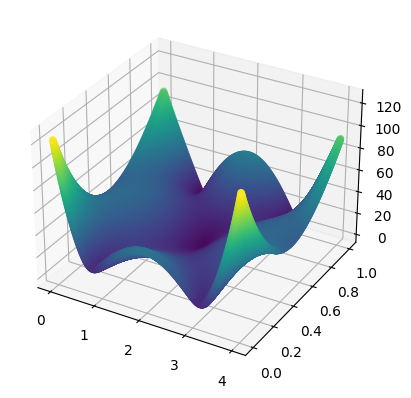

In [17]:
X = dem.datatest
Nx = dem.num_test_x
Ny = dem.num_test_y
ux = np.reshape(dem.surUx, (Nx*Ny, 1))
uy = np.reshape(dem.surUy, (Nx*Ny, 1))
u = np.concatenate([ux, uy], axis=1)
X_new = X + u
s_von_mises = np.reshape(dem.SVonMises, (Nx*Ny,))

ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], s_von_mises,c=s_von_mises, cmap='viridis')

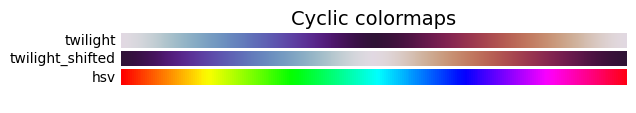

In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from colorspacious import cspace_converter

cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list


plot_color_gradients('Cyclic', ['twilight', 'twilight_shifted', 'hsv'])

In [19]:
dem.datatest[251, 0]

2.012024048096192

In [22]:
with open('C:\\College Material\\Hyper-elastic model\\Finer mesh.txt', 'r') as file:
    fp = file.read()

lines = fp.split('\n')

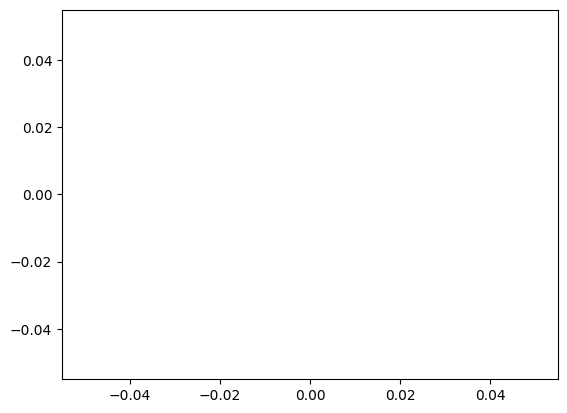

In [25]:
plt.scatter(X, Y)

In [24]:
X = []
Y = []
Z = []
uy = []
VonMises = []

for i in range(8, len(fp)):

  ls = fp[i].split(' ')
  rls = []
  for element in ls:
    if element != '':
      rls.append(element)

  if len(rls) ==7:
    X.append(rls[0])
    Y.append(rls[1])
    Z.append(rls[2])
    VonMises.append(rls[3])
    uy.append(rls[-1])

In [26]:
Uy = [el[:-1] for el in uy]
Uy

[]

In [27]:
X_i = [float(x) for x in X]
Z_i = [float(z) for z in Z]
uy_i = [float(uyy) for uyy in uy]
vm = [float(vmi) for vmi in VonMises]

In [28]:
x, y, vonmises = np.array(X_i), np.array(Z_i), np.array(vm)
x.shape, y.shape, vonmises.shape

((0,), (0,), (0,))

In [29]:
arr = np.array([1, 0, 2, 0, 3, 0, 4, 5, 0])
zero_indices = np.where(arr == 0)

print(zero_indices)  

(array([1, 3, 5, 8], dtype=int64),)


In [30]:
x_4 = [4-xx for xx in x]

In [31]:
x = np.concatenate([x, x_4], axis=0)
y = np.concatenate([y, y], axis=0)

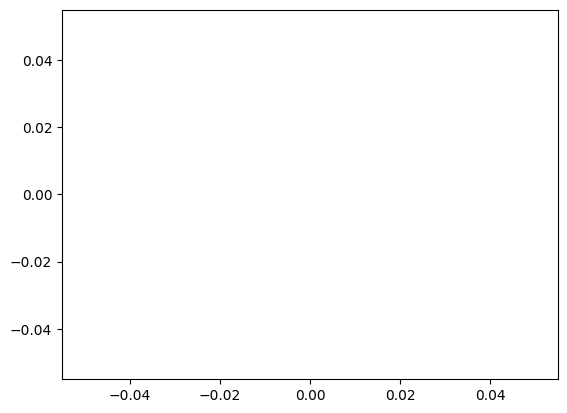

In [32]:
plt.scatter(x, y)

In [ ]:
vonmises = np.concatenate([vonmises,vonmises], axis=0)
uy = np.concatenate([uy, uy], axis=0)

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, vonmises,  cmap='viridis', linewidth=0.5)